# Dan Journic's First draft of Project code

This is the beginning of my code for the Phase 1 Project. The assignment is: Microsoft wants in on the streaming movie market and has asked me to analyze movie data to see what their best course of action would be. So the plan is to import a number of dataframes regarding movie budgets, ticket sales, ratings, etc.
I then need to ask and answer 3 questions:
1. What movies make the most money?
2. What movies lost the most money?
3. What Microsoft properties have made the most money?
So here goes. Start by importing all the necessary libraries:

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from bs4 import BeautifulSoup as bsoup
import requests
%matplotlib inline
#!pip install lxml
#!pip install html5lib

Now let's read some csv files:

In [78]:
gross=pd.read_csv('bom.movie_gross.csv.gz')
imdb_rat=pd.read_csv('imdb.title.ratings.csv.gz') #this one's useless
rot_tom=pd.read_csv('rt.movie_info.tsv.gz', delimiter = '\t') #also useless
budgets=pd.read_csv('tn.movie_budgets.csv.gz')
tmdb=pd.read_csv('tmdb.movies.csv.gz')

So let's take a look at them:

In [3]:
gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [5]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [6]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [7]:
budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


You may have noticed that there are a few files hashed tagged out, that's because I had looked at them previously and decided they wouldn't work with the scope of my goals.
So the next step I want to take is to turn the date released into an actual date, and turn the dollar amounts into numbers I can use.

In [8]:
budgets['release_date'] = pd.to_datetime(budgets['release_date'])

In [9]:
budgets['production_budget'] = budgets['production_budget'].replace('[\$,]', '', regex=True).astype(float)
budgets['domestic_gross'] = budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(float)
budgets['worldwide_gross'] = budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Those numbers are pretty big, so I'm going to divide them by 1 million, to make them more manageable.

In [11]:
budgets[budgets.columns[3:]] = budgets[budgets.columns[3:]].apply(lambda x: x/1000000)

And now let's see what the biggest domestic grossing movie is:

In [12]:
budgets.sort_values(by=['domestic_gross'],ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747
43,44,2018-06-15,Incredibles 2,200.0,608.581744,1242.520711
74,75,2008-07-18,The Dark Knight,185.0,533.720947,1001.996207


And now for worldwide gross:

In [13]:
budgets.sort_values(by=['worldwide_gross'],ascending=False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864
66,67,2015-04-03,Furious 7,190.0,353.007020,1518.722794
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125.0,381.193157,1341.693157


So let's make a new column: 'world_net', that will be the worldwide gross subtracting the production budget.

In [14]:
budgets['world_net']=budgets['worldwide_gross'] - budgets['production_budget']

In [15]:
budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2351.345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410.6,241.063875,1045.663875,635.063875
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-200.237650
3,4,2015-05-01,Avengers: Age of Ultron,330.6,459.005868,1403.013963,1072.413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317.0,620.181382,1316.721747,999.721747
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300.0,309.420425,963.420425,663.420425
8,9,2017-11-17,Justice League,300.0,229.024295,655.945209,355.945209
9,10,2015-11-06,Spectre,300.0,200.074175,879.620923,579.620923


So we'll create a new dataframe, 'budgets_wn', which is the budgets dataframe sorted by world net.

In [16]:
budgets_wn=budgets.sort_values(by=['world_net'],ascending=False)

In [17]:
budgets_wn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net
0,1,2009-12-18,Avatar,425.0,760.507625,2776.345279,2351.345279
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,2008.208395
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864,1433.854864
66,67,2015-04-03,Furious 7,190.0,353.007020,1518.722794,1328.722794
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897,1292.935897
260,61,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125.0,381.193157,1341.693157,1216.693157
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224,1148.258224
112,13,2018-06-22,Jurassic World: Fallen Kingdom,170.0,417.719760,1305.772799,1135.772799


So let's make another column 'dom_net', the domestic net profit:

In [18]:
budgets['dom_net']=budgets['domestic_gross'] - budgets['production_budget']

In [19]:
budgets_dn=budgets.sort_values(by=['dom_net'],ascending=False)
budgets_dn.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net,dom_net
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306.0,936.662225,2053.311220,1747.311220,630.662225
41,42,2018-02-16,Black Panther,200.0,700.059566,1348.258224,1148.258224,500.059566
42,43,1997-12-19,Titanic,200.0,659.363944,2208.208395,2008.208395,459.363944
3464,65,1977-05-25,Star Wars Ep. IV: A New Hope,11.0,460.998007,786.598007,775.598007,449.998007
33,34,2015-06-12,Jurassic World,215.0,652.270625,1648.854864,1433.854864,437.270625
3525,26,1982-06-11,ET: The Extra-Terrestrial,10.5,435.110554,792.965326,782.465326,424.610554
43,44,2018-06-15,Incredibles 2,200.0,608.581744,1242.520711,1042.520711,408.581744
26,27,2012-05-04,The Avengers,225.0,623.279547,1517.935897,1292.935897,398.279547
6,7,2018-04-27,Avengers: Infinity War,300.0,678.815482,2048.134200,1748.134200,378.815482
692,93,2004-05-19,Shrek 2,70.0,441.226247,937.008132,867.008132,371.226247


Let's do some work on the 'gross' dataframe. Basically what was done to the budgets dataframe. First, we'll see what it looks like:

In [20]:
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


So the only issue is that the foreign gross isn't a number. Let's fix that:

In [21]:
gross['foreign_gross'] = gross['foreign_gross'].replace('[\,,]', '', regex=True).astype(float)
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null float64
year              3387 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 132.4+ KB


Now to see some sorted values:

In [22]:
gross.sort_values(by=['domestic_gross'],ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,1131.6,2015
3080,Black Panther,BV,700100000.0,646900000.0,2018
3079,Avengers: Infinity War,BV,678800000.0,1369.5,2018
1873,Jurassic World,Uni.,652300000.0,1019.4,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017
3082,Incredibles 2,BV,608600000.0,634200000.0,2018
2323,Rogue One: A Star Wars Story,BV,532200000.0,523900000.0,2016
2759,Beauty and the Beast (2017),BV,504000000.0,759500000.0,2017
2324,Finding Dory,BV,486300000.0,542300000.0,2016


In [23]:
gross.sort_values(by=['foreign_gross'],ascending=False).head(10)

,title,studio,domestic_gross,foreign_gross,year
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012
3081,Jurassic World: Fallen Kingdom,Uni.,417700000.0,891800000.0,2018
1127,Frozen,BV,400700000.0,875700000.0,2013
2764,Wolf Warrior 2,HC,2700000.0,867600000.0,2017
1477,Transformers: Age of Extinction,Par.,245400000.0,858600000.0,2014
1876,Minions,Uni.,336000000.0,823400000.0,2015
3083,Aquaman,WB,335100000.0,812700000.0,2018
1128,Iron Man 3,BV,409000000.0,805800000.0,2013


The problem here is that these numbers don't match. Titanic and Avatar are no where to be seen. So I don't think I'll be using this dataset.

In [24]:
gross['foreign_gross'] = gross['foreign_gross'].replace(',', '')
gross_top_frn=gross.sort_values(by=['foreign_gross'],ascending=False).head(10)

In [25]:
gross_top_frn['foreign_gross']=gross_top_frn['foreign_gross'].astype(float)

In [26]:
gross['total'] = gross['foreign_gross'] + gross['domestic_gross']

In [27]:
gross_top_frn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 328 to 1128
Data columns (total 5 columns):
title             10 non-null object
studio            10 non-null object
domestic_gross    10 non-null float64
foreign_gross     10 non-null float64
year              10 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 480.0+ bytes


In [28]:
gross_top=gross.sort_values(by=['total'],ascending=False).head(10)

In [29]:
gross_top['domestic_gross']=gross_top['domestic_gross']/1000000

In [30]:
gross_top.drop('year',axis =1,inplace=True)

In [31]:
gross_top[gross_top.columns[3:]] = gross_top[gross_top.columns[3:]].apply(lambda x: x/1000000)

In [32]:
gross_top

,title,studio,domestic_gross,foreign_gross,total
727,Marvel's The Avengers,BV,623.4,895.5,1518.9
1875,Avengers: Age of Ultron,BV,459.0,946.4,1405.4
3080,Black Panther,BV,700.1,646.9,1347.0
328,Harry Potter and the Deathly Hallows Part 2,WB,381.0,960.5,1341.5
2758,Star Wars: The Last Jedi,BV,620.2,712.4,1332.6
3081,Jurassic World: Fallen Kingdom,Uni.,417.7,891.8,1309.5
1127,Frozen,BV,400.7,875.7,1276.4
2759,Beauty and the Beast (2017),BV,504.0,759.5,1263.5
3082,Incredibles 2,BV,608.6,634.2,1242.8
1128,Iron Man 3,BV,409.0,805.8,1214.8


Getting back to the budgets dataframe. Let's start making some visualizations. How about a nice graph of the top 10 highest grossing movies? I'll start by making a new dataframe of just the top 10 highest grossing (using worldwide gross)movies.

In [33]:
budgets_top=budgets.sort_values(by=['worldwide_gross'],ascending=False).head(10)

Text(0, 0.5, ' ')

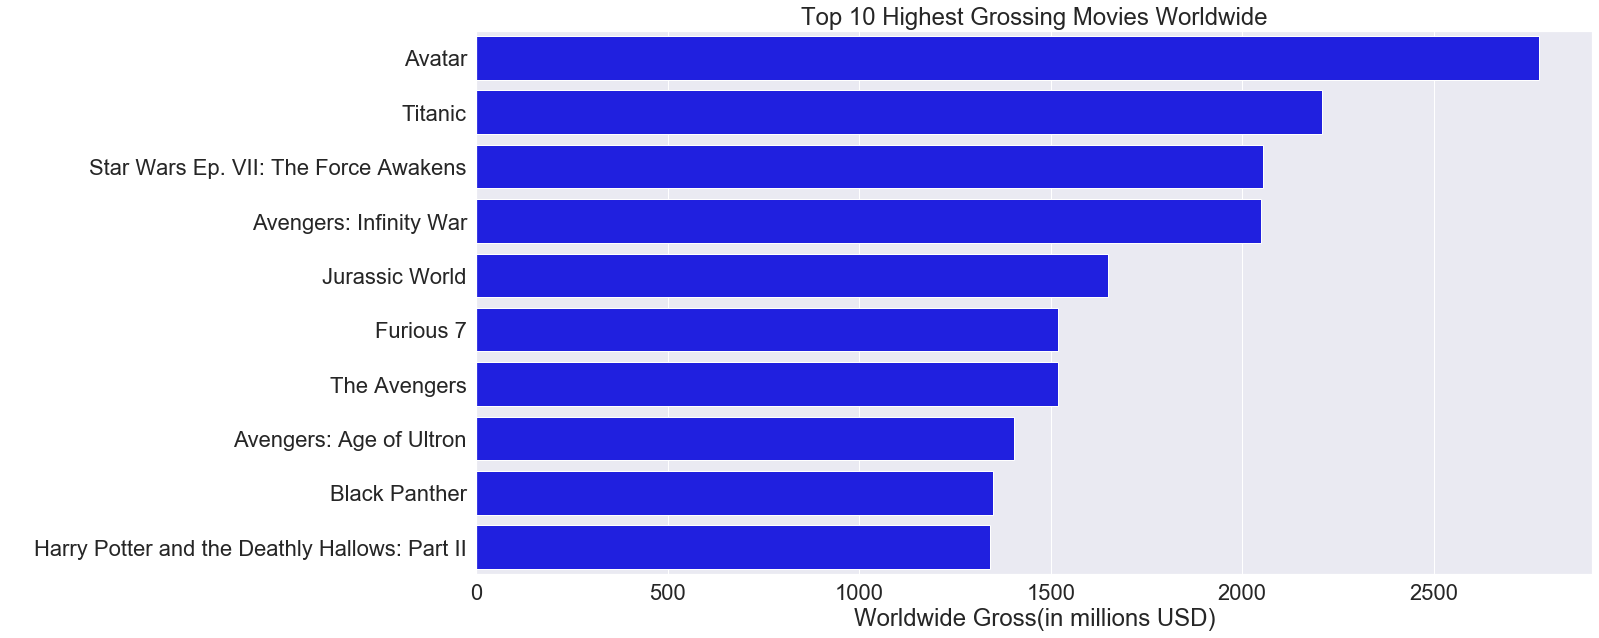

In [35]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="worldwide_gross", y="movie", data=budgets_top, color='blue')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel("Worldwide Gross(in millions USD)")
plt.title("Top 10 Highest Grossing Movies Worldwide")
plt.ylabel(" ")

I'm no expert or anything, but that's a nice looking graph. So let's do the same thing, but with worldwide net.

In [36]:
budgets_top_net=budgets_wn.sort_values(by=['world_net'],ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Movies Worldwide Net')

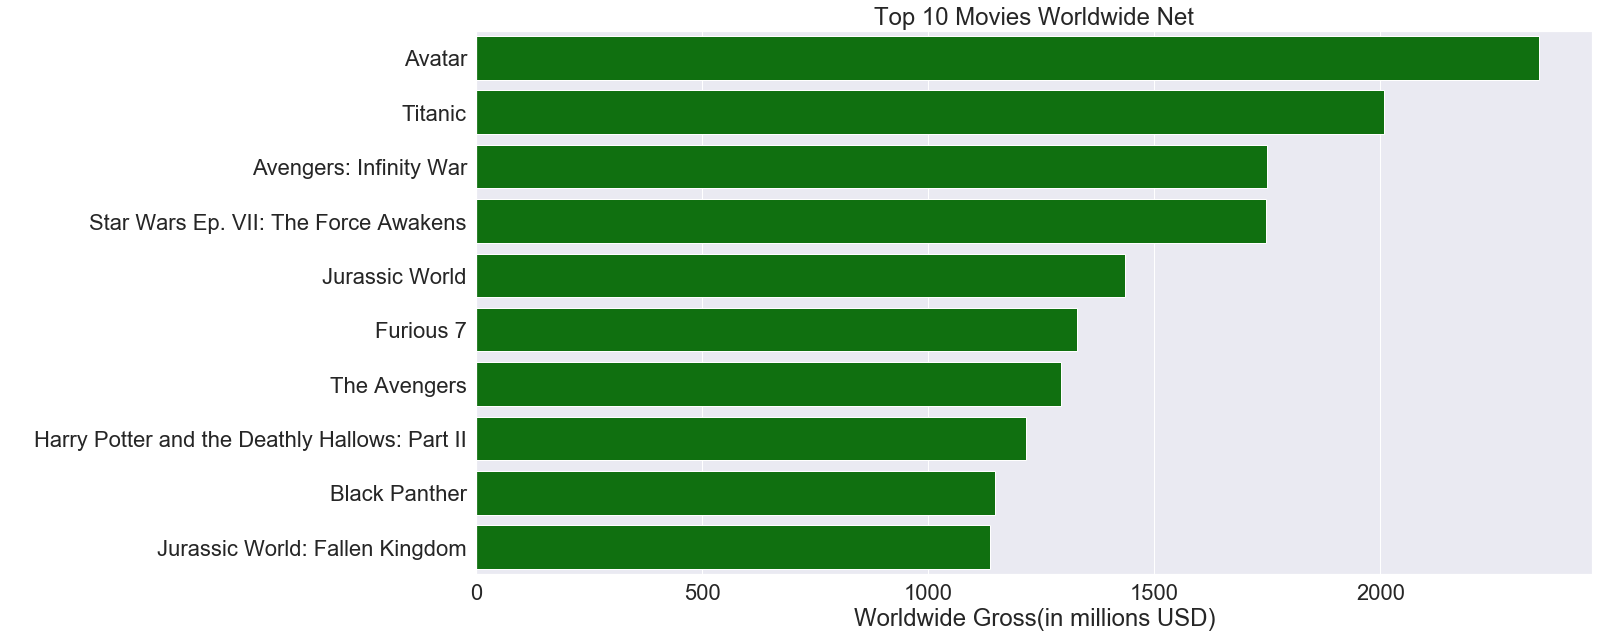

In [37]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="world_net", y="movie", data=budgets_top_net, color='green')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel("Worldwide Gross(in millions USD)")
plt.ylabel(" ")
plt.title("Top 10 Movies Worldwide Net")

So there's definitely a trend here: sci-fi fantasy, and sequels. So now let's look at the worst movies in the budget dataframe.

In [38]:
budgets_net=budgets.sort_values(by=['world_net'],ascending=False)

In [39]:
budgets_net.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net,dom_net
477,78,2017-04-21,The Promise,90.0,8.224288,10.551417,-79.448583,-81.775712
535,36,2020-02-21,Call of the Wild,82.0,0.000000,0.000000,-82.000000,-82.000000
479,80,2017-12-13,Bright,90.0,0.000000,0.000000,-90.000000,-90.000000
480,81,2019-12-31,Army of the Dead,90.0,0.000000,0.000000,-90.000000,-90.000000
404,5,2002-08-16,The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005,-95.588898
352,53,2001-04-27,Town & Country,105.0,6.712451,10.364769,-94.635231,-98.287549
341,42,2019-06-14,Men in Black: International,110.0,3.100000,3.100000,-106.900000,-106.900000
193,94,2011-03-11,Mars Needs Moms,150.0,21.392758,39.549758,-110.450242,-128.607242
194,95,2020-12-31,Moonfall,150.0,0.000000,0.000000,-150.000000,-150.000000
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-200.237650,-307.237650


So there are a few movies here that have made no money.That can't be right. Army of the Dead hasn't been released yet, Bright is a Netflix original (so it's tough to know how much money it actually made), and a quick google search says that Call of the Wild actually made $107 million worldwide. So it's clear that for whatever reason, the numbers were not included in the dataframe. So I think it would simply be best for me to remove them entirely.

In [40]:
budgets_net=budgets_net[budgets_net.domestic_gross != 0.0]

In [41]:
budgets_net.tail(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,world_net,dom_net
669,70,2001-02-23,Monkeybone,75.0,5.409517,5.409517,-69.590483,-69.590483
300,1,2010-12-17,How Do You Know?,120.0,30.212620,49.628177,-70.371823,-89.787380
435,36,1995-12-22,Cutthroat Island,92.0,10.017322,18.517322,-73.482678,-81.982678
607,8,2005-09-02,A Sound of Thunder,80.0,1.900451,6.300451,-73.699549,-78.099549
477,78,2017-04-21,The Promise,90.0,8.224288,10.551417,-79.448583,-81.775712
404,5,2002-08-16,The Adventures of Pluto Nash,100.0,4.411102,7.094995,-92.905005,-95.588898
352,53,2001-04-27,Town & Country,105.0,6.712451,10.364769,-94.635231,-98.287549
341,42,2019-06-14,Men in Black: International,110.0,3.100000,3.100000,-106.900000,-106.900000
193,94,2011-03-11,Mars Needs Moms,150.0,21.392758,39.549758,-110.450242,-128.607242
2,3,2019-06-07,Dark Phoenix,350.0,42.762350,149.762350,-200.237650,-307.237650


So let's make another dataframe to graph, just the bottom 10 movies.

In [42]:
budgets_bot=budgets_net.tail(10)

Text(0.5, 1.0, 'Bottom 10 Movies Worldwide Net')

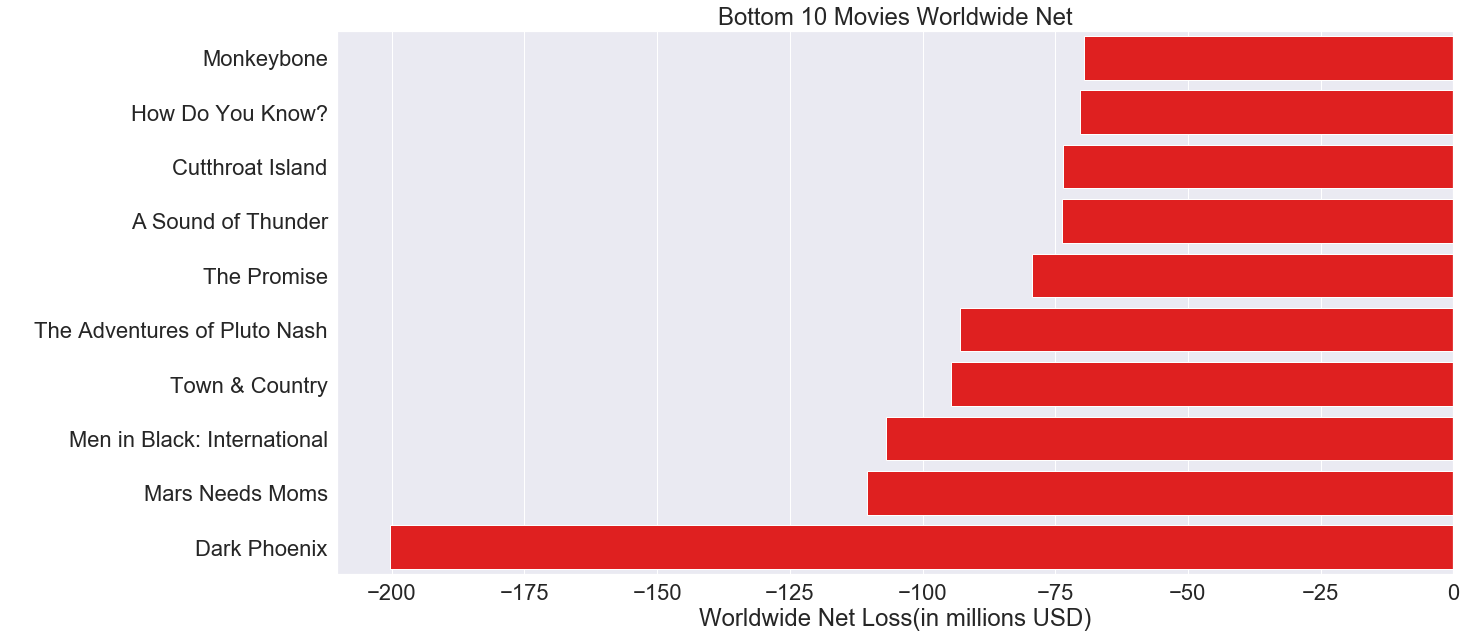

In [43]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="world_net", y="movie", data=budgets_bot, color='red')
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.xlabel("Worldwide Net Loss(in millions USD)")
plt.ylabel(" ")
plt.title("Bottom 10 Movies Worldwide Net")

The problem I'm seeing with these files is that they aren't up to date. I think that's why there is the missing data. The other problem is that it's cut off. Take the above graph, that's simply the bottom 10 movies in that dataframe.

While this graph also looks pretty good, I think I'd like it better if it went the other direction. But for now let's get some more data. Let's grab some data from wikipedia's article on the biggest box office bombs.

In [3]:
resp=requests.get("https://en.wikipedia.org/wiki/List_of_biggest_box-office_bombs")

In [4]:
soup= bsoup(resp.text)

In [5]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of biggest box-office bombs - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"587fcff4-87a6-417d-b2d1-01d0332d61ea","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_biggest_box-office_bombs","wgTitle":"List of biggest box-office bombs","wgCurRevisionId":992062868,"wgRevisionId":992062868,"wgArticleId":24970695,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with non-numeric formatnum arguments","Articles with short description","Short descript

That's definitely something. Not sure what, just yet. Let's see if we can get a table out of that.

In [6]:
bomb_table=soup.find('table', {'class':'wikitable'})

In [7]:
bomb_table

<table class="wikitable sortable plainrowheaders" style="margin:auto;">
<caption>Biggest box office bombs
</caption>
<tbody><tr>
<th rowspan="2" scope="col">Title
</th>
<th rowspan="2" scope="col">Year
</th>
<th rowspan="2" scope="col">Net production budget<br/><span style="font-size:85%;">(millions)</span>
</th>
<th rowspan="2" scope="col">Worldwide gross<br/><span style="font-size:85%;">(millions)</span>
</th>
<th colspan="2" scope="col">Estimated loss <span style="font-size:85%;">(millions)</span>
</th>
<th class="unsortable" scope="col"><abbr title="Reference">Ref.</abbr>
</th></tr>
<tr>
<th scope="col">Nominal
</th>
<th scope="col">Adjusted for inflation
</th>
<th class="unsortable" scope="col"><sup class="reference" id="cite_ref-inflation-US_10-0"><a href="#cite_note-inflation-US-10">[nb 1]</a></sup>
</th></tr>
<tr>
<th scope="row"><span data-sort-value="13th Warrior !"><i><a href="/wiki/The_13th_Warrior" title="The 13th Warrior">The 13th Warrior</a></i></span>
</th>
<td style="t

Ok, maybe grab a dataframe out of that.

In [8]:
bombs= pd.read_html(bomb_table.prettify())[0]

In [9]:
bombs

Title  Year  \
                                    Title  Year   
0                        The 13th Warrior  1999   
1                                47 Ronin  2013   
2      The Adventures of Baron Munchausen  1988   
3            The Adventures of Pluto Nash  2002   
4    The Adventures of Rocky & Bullwinkle  2000   
..                                    ...   ...   
113                           Windtalkers  2002   
114                           The Wolfman  2010   
115                     A Wrinkle in Time  2018   
116               xXx: State of the Union  2005   
117                                  Zoom  2006   

    Net production budget  (millions) Worldwide gross  (millions)  \
    Net production budget  (millions) Worldwide gross  (millions)   
0                            $100–160                       $61.7   
1                            $175–225                      $151.8   
2                               $46.6                        $8.1   
3                                $100                        $7.1   
4                            $76–98.6                       $35.1   
..                                ...                         ...   
113                          $115–120                       $77.6   
114                              $150                      $139.8   
115                              $125                      $133.4   
116                            $113.1                         $71   
117                             $75.6                       $12.5   

    Estimated loss  (millions)                            Ref.  
                       Nominal Adjusted for inflation   [nb 1]  
0                      $69–129               $106–198    [# 1]  
1                          $97                   $106    [# 2]  
2                        $38.5                    $83    [# 3]  
3                          $96                   $136    [# 4]  
4                        $63.5                    $94    [# 5]  
..                         ...                    ...      ...  
113                     $76–81               $108–115  [# 114]  
114                        $76                    $89  [# 115]  
115                     $130.6                   $133  [# 116]  
116                        $78                   $102  [# 117]  
117                        $69                    $88  [# 118]  

[118 rows x 7 columns]

Nice. Except there are 2 rows of headers, so let's take a closer look at this.

In [10]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 7 columns):
(Title, Title)                                                            118 non-null object
(Year, Year)                                                              118 non-null int64
(Net production budget  (millions), Net production budget  (millions))    118 non-null object
(Worldwide gross  (millions), Worldwide gross  (millions))                118 non-null object
(Estimated loss  (millions), Nominal)                                     118 non-null object
(Estimated loss  (millions), Adjusted for inflation)                      118 non-null object
(Ref., [nb 1])                                                            118 non-null object
dtypes: int64(1), object(6)
memory usage: 6.6+ KB


In [11]:
bombs.columns

MultiIndex([(                            'Title', ...),
            (                             'Year', ...),
            ('Net production budget  (millions)', ...),
            (      'Worldwide gross  (millions)', ...),
            (       'Estimated loss  (millions)', ...),
            (       'Estimated loss  (millions)', ...),
            (                             'Ref.', ...)],
           )

Ok, let's try to fix this. We'll make a list of column names, and look to put them into the dataframe.

In [12]:
names=['title','year','net_prod_budget','WW_Gross','Est_loss_nom','Est_loss_adj','Ref']

In [13]:
bombs.columns=names

In [14]:
bombs

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj,Ref
0,The 13th Warrior,1999,$100–160,$61.7,$69–129,$106–198,[# 1]
1,47 Ronin,2013,$175–225,$151.8,$97,$106,[# 2]
2,The Adventures of Baron Munchausen,1988,$46.6,$8.1,$38.5,$83,[# 3]
3,The Adventures of Pluto Nash,2002,$100,$7.1,$96,$136,[# 4]
4,The Adventures of Rocky & Bullwinkle,2000,$76–98.6,$35.1,$63.5,$94,[# 5]
...,...,...,...,...,...,...,...
113,Windtalkers,2002,$115–120,$77.6,$76–81,$108–115,[# 114]
114,The Wolfman,2010,$150,$139.8,$76,$89,[# 115]
115,A Wrinkle in Time,2018,$125,$133.4,$130.6,$133,[# 116]
116,xXx: State of the Union,2005,$113.1,$71,$78,$102,[# 117]


Excellent. So the next problem is that several of these aren't really numbers (well technically none of them are, but we'll get to that) but ranges of numbers. So we need to fix that somehow. One thing's for sure, we don't need that Ref column, so let's drop it.

In [15]:
bombs.drop('Ref', axis=1, inplace=True)

In [16]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,$100–160,$61.7,$69–129,$106–198
1,47 Ronin,2013,$175–225,$151.8,$97,$106
2,The Adventures of Baron Munchausen,1988,$46.6,$8.1,$38.5,$83
3,The Adventures of Pluto Nash,2002,$100,$7.1,$96,$136
4,The Adventures of Rocky & Bullwinkle,2000,$76–98.6,$35.1,$63.5,$94


Good, now let's try to make these actual numbers instead of objects. I'm hoping it won't interpret the '-' as a minus sign and then subtract those numbers automatically. First off, let's dump the '$'.

In [17]:
bombs['Est_loss_adj'] = bombs['Est_loss_adj'].replace('[\$,]', '', regex=True)
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,$100–160,$61.7,$69–129,106–198
1,47 Ronin,2013,$175–225,$151.8,$97,106
2,The Adventures of Baron Munchausen,1988,$46.6,$8.1,$38.5,83
3,The Adventures of Pluto Nash,2002,$100,$7.1,$96,136
4,The Adventures of Rocky & Bullwinkle,2000,$76–98.6,$35.1,$63.5,94


In [18]:
bombs['Est_loss_nom'] = bombs['Est_loss_nom'].replace('[\$,]', '', regex=True)
bombs['WW_Gross'] = bombs['WW_Gross'].replace('[\$,]', '', regex=True)
bombs['net_prod_budget'] = bombs['net_prod_budget'].replace('[\$,]', '', regex=True)

In [19]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,100–160,61.7,69–129,106–198
1,47 Ronin,2013,175–225,151.8,97,106
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,83
3,The Adventures of Pluto Nash,2002,100,7.1,96,136
4,The Adventures of Rocky & Bullwinkle,2000,76–98.6,35.1,63.5,94


Ok, so now how to change the range of numbers into actual numbers?

In [20]:
len(bombs['net_prod_budget'][1])

7

This tells us we can go through the list, split the object at the '-'. But then we need to change them into floats, then take the mean. So let's break that into simpler steps.
Step 1: Split at the '-'

In [21]:
bombs['net_prod_budget'][0].split('–')

['100', '160']

Perfect, so now we've created a list with 2 elements. Sort of. Let's really create a list, call it 'rang' because it'll be the range.

In [22]:
rang=bombs['net_prod_budget'][0].split('–')

In [23]:
rang

['100', '160']

Sweet. Now we can take those strings, turn them into floats.

In [24]:
rang=[float(i) for i in rang]
rang

[100.0, 160.0]

Step 2 complete. Step 3: create a new variable that contains the mean of our list. The mean seems to me to be the best number to use to best represent what the true number would be.

In [25]:
rang_mean=sum(rang)/len(rang)
rang_mean

130.0

Ok, Step 3 done. Now to put it back into the dataframe.

In [26]:
bombs['net_prod_budget'][0]=rang_mean

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130,61.7,69–129,106–198
1,47 Ronin,2013,175–225,151.8,97,106
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,83
3,The Adventures of Pluto Nash,2002,100,7.1,96,136
4,The Adventures of Rocky & Bullwinkle,2000,76–98.6,35.1,63.5,94


Sure we get a warning, but it worked. So now we need to combine all this into a function and run it through every column. But only if the column contains a dash. If it doesn't contain a dash, it just needs to convert the number to a float. Ok, let's take a step back: let's simply write a for loop to go through a particular column. Then we can write a function to go through an entire dataframe.

In [28]:
numb=list(range(1, len(bombs['net_prod_budget'])))

In [29]:
for x in numb:
    if '–' not in bombs['net_prod_budget'][x]:
        bombs['net_prod_budget'][x]=float(bombs['net_prod_budget'][x])
    else:
        rangx=bombs['net_prod_budget'][x].split('–')
        rangx=[float(i) for i in rangx]
        rangx_mean=sum(rangx)/len(rangx)
        bombs['net_prod_budget'][x]=rangx_mean

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130,61.7,69–129,106–198
1,47 Ronin,2013,200,151.8,97,106
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,83
3,The Adventures of Pluto Nash,2002,100,7.1,96,136
4,The Adventures of Rocky & Bullwinkle,2000,87.3,35.1,63.5,94


Again, we're getting warnings, but no errors. So we'll take it.

In [31]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
title              118 non-null object
year               118 non-null int64
net_prod_budget    118 non-null object
WW_Gross           118 non-null object
Est_loss_nom       118 non-null object
Est_loss_adj       118 non-null object
dtypes: int64(1), object(5)
memory usage: 5.7+ KB


In [32]:
bombs.tail()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
113,Windtalkers,2002,117.5,77.6,76–81,108–115
114,The Wolfman,2010,150,139.8,76,89
115,A Wrinkle in Time,2018,125,133.4,130.6,133
116,xXx: State of the Union,2005,113.1,71,78,102
117,Zoom,2006,75.6,12.5,69,88


Ok, so we got one column squared away, sort of. It's still filled with objects, and not numbers. So let's see if we can fix that:

In [33]:
type((bombs['net_prod_budget'][0]))

float

In [34]:
bombs['net_prod_budget']=bombs['net_prod_budget'].astype(float)

In [35]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
title              118 non-null object
year               118 non-null int64
net_prod_budget    118 non-null float64
WW_Gross           118 non-null object
Est_loss_nom       118 non-null object
Est_loss_adj       118 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.7+ KB


Ok, there, one column fixed. Now to do it for the next few columns:

We'll make a function, called 'changeover', that'll take in a single variable (in this case, it'll be the column value) then it'll remove the dash and change it to the mean, if it's a range of values. If not, it'll remove a '+', if none of those are present, it'll just change the number to a float.

In [36]:
def changeover (var1):
    if '–' in var1:
        rangx=var1.split('–')
        rangx=[float(i) for i in rangx]
        rangx_mean=sum(rangx)/len(rangx)
        var1=rangx_mean        
    elif '+' in var1:
        rangx=var1.split('+')
        var1=float(rangx[0])
    else:
        var1=float(var1)
    return var1

In [37]:
bombs['Est_loss_nom'] = bombs['Est_loss_nom'].map(changeover)

Ok, it's possible that worked. Let's try it again.

In [38]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
title              118 non-null object
year               118 non-null int64
net_prod_budget    118 non-null float64
WW_Gross           118 non-null object
Est_loss_nom       118 non-null float64
Est_loss_adj       118 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 5.7+ KB


It sure did work. So let's run it through the next columns.

In [39]:
bombs['Est_loss_adj'] = bombs['Est_loss_adj'].map(changeover)

In [40]:
bombs['WW_Gross'] = bombs['WW_Gross'].map(changeover)

In [41]:
bombs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 6 columns):
title              118 non-null object
year               118 non-null int64
net_prod_budget    118 non-null float64
WW_Gross           118 non-null float64
Est_loss_nom       118 non-null float64
Est_loss_adj       118 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.7+ KB


In [42]:
bombs.head()

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
0,The 13th Warrior,1999,130.0,61.7,99.0,152.0
1,47 Ronin,2013,200.0,151.8,97.0,106.0
2,The Adventures of Baron Munchausen,1988,46.6,8.1,38.5,83.0
3,The Adventures of Pluto Nash,2002,100.0,7.1,96.0,136.0
4,The Adventures of Rocky & Bullwinkle,2000,87.3,35.1,63.5,94.0


THE BIG BRAIN AM WINNING AGAIN!!! I ARE THE GREETEST!!!
Sorry, just got a little carried away that that had worked. Now let's try sorting by Est Loss(nominal, I'm not worried about adjusted)

In [43]:
bombs_nom=bombs.sort_values(by=['Est_loss_nom'],ascending=False).head(10)

In [44]:
bombs_nom

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
72,The Lone Ranger,2013,237.5,260.5,175.0,192.5
79,Mortal Engines,2018,110.0,83.7,174.8,178.0
61,John Carter,2012,263.7,284.1,157.0,175.0
64,King Arthur: Legend of the Sword,2017,175.0,148.7,133.6,139.5
115,A Wrinkle in Time,2018,125.0,133.4,130.6,133.0
100,Sinbad: Legend of the Seven Seas,2003,60.0,80.8,125.0,174.0
75,Mars Needs Moms,2011,150.0,39.0,122.0,139.0
106,Terminator: Dark Fate,2019,190.5,261.1,120.0,122.0
108,Tomorrowland,2015,185.0,209.0,120.0,129.5
83,Pan,2015,150.0,128.4,117.5,127.0


In [45]:
bombs_adj=bombs.sort_values(by=['Est_loss_adj'],ascending=False).head(10)
bombs_adj

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
72,The Lone Ranger,2013,237.5,260.5,175.0,192.5
79,Mortal Engines,2018,110.0,83.7,174.8,178.0
25,Cutthroat Island [nb 2],1995,98.0,18.3,105.0,176.0
61,John Carter,2012,263.7,284.1,157.0,175.0
100,Sinbad: Legend of the Seven Seas,2003,60.0,80.8,125.0,174.0
0,The 13th Warrior,1999,130.0,61.7,99.0,152.0
107,Titan A.E.,2000,82.5,36.8,100.0,148.0
64,King Arthur: Legend of the Sword,2017,175.0,148.7,133.6,139.5
75,Mars Needs Moms,2011,150.0,39.0,122.0,139.0
37,Final Fantasy: The Spirits Within,2001,137.0,85.1,94.0,136.0


I know I said I'm not interested in the adjusted loss, since an adjusted loss doesn't appear on anyone's books, only the actual loss. I just sorted by the adjusted for fun.
Ok, so let's make a graph:

Text(0.5, 1.0, '10 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)')

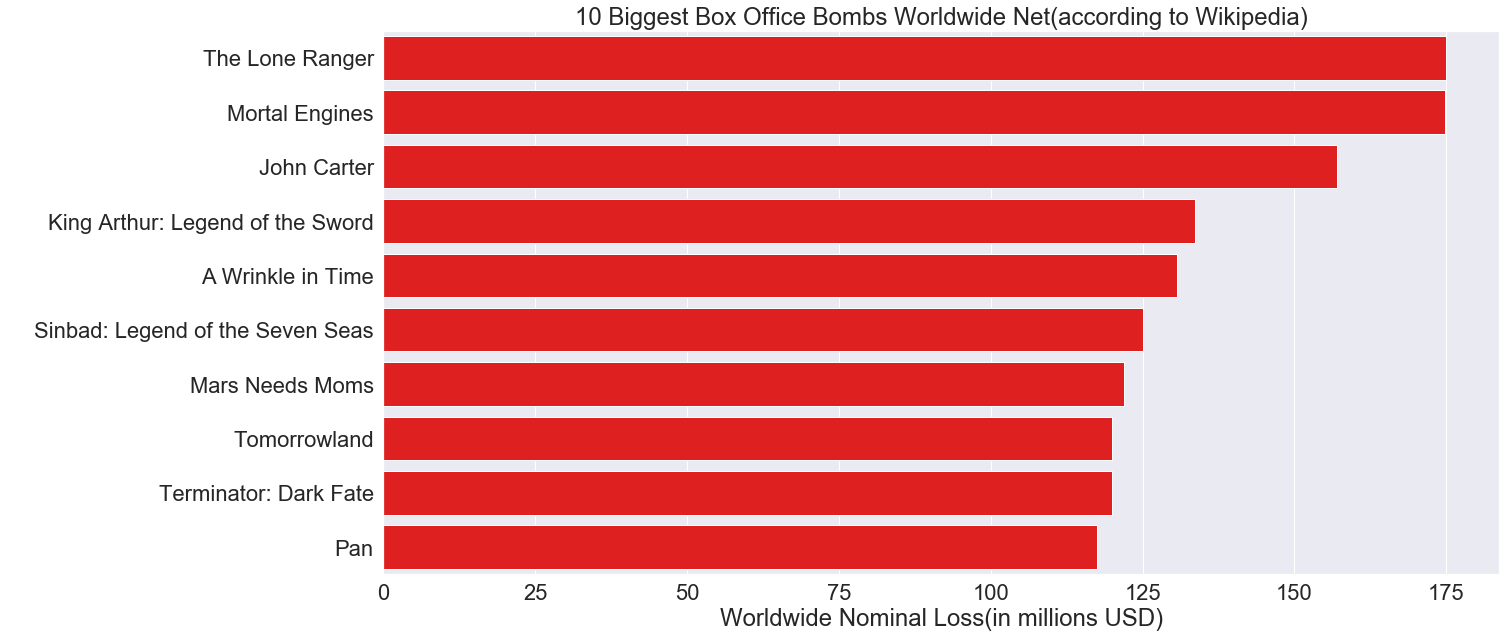

In [88]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Est_loss_nom", y="title", data=bombs_nom, color='red')
plt.xlabel("Worldwide Nominal Loss(in millions USD)")
plt.ylabel(" ")
plt.title("10 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)")

I do like this data more than the bottom of the budgets dataframe.
Let's get some more data from Wikipedia.

In [46]:
resp2= requests.get("https://en.wikipedia.org/wiki/List_of_highest-grossing_films")

In [47]:
soup2= bsoup(resp2.text)

In [48]:
tops_table=soup2.find('table', {'class':'wikitable'})

In [49]:
tops_table

<table class="wikitable sortable plainrowheaders" style="margin:auto; margin:auto;">
<caption>Highest-grossing films<sup class="reference" id="cite_ref-13"><a href="#cite_note-13">[13]</a></sup>
</caption>
<tbody><tr>
<th scope="col">Rank
</th>
<th scope="col">Peak
</th>
<th scope="col">Title
</th>
<th scope="col">Worldwide gross
</th>
<th scope="col">Year
</th>
<th class="unsortable" scope="col">Reference(s)
</th></tr>
<tr>
<td>1
</td>
<td>1
</td>
<th scope="row"><i><a href="/wiki/Avengers:_Endgame" title="Avengers: Endgame">Avengers: Endgame</a></i>
</th>
<td align="right">$2,797,800,564
</td>
<td data-sort-value="2019-04" style="text-align:center;">2019
</td>
<td style="text-align:center;"><sup class="reference" id="cite_ref-endgame_14-0"><a href="#cite_note-endgame-14">[# 1]</a></sup><sup class="reference" id="cite_ref-endgame_peak_15-0"><a href="#cite_note-endgame_peak-15">[# 2]</a></sup>
</td></tr>
<tr>
<td>2
</td>
<td>1
</td>
<th scope="row"><i><a href="/wiki/Avatar_(2009_film)"

In [50]:
tops= pd.read_html(tops_table.prettify())[0]

In [51]:
tops

,Rank,Peak,Title,Worldwide gross,Year,Reference(s)
0,1,1,Avengers: Endgame,"$2,797,800,564",2019,[# 1] [# 2]
1,2,1,Avatar,"$2,790,439,000",2009,[# 3] [# 4]
2,3,1,Titanic,"$2,194,439,542",1997,[# 5] [# 6]
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015,[# 7] [# 8]
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018,[# 9] [# 10]
5,6,3,Jurassic World,"$1,671,713,208",2015,[# 11] [# 12]
6,7,7,The Lion King,"$1,656,943,394",2019,[# 13] [# 2]
7,8,3,The Avengers,"$1,518,812,988",2012,[# 14] [# 15]
8,9,4,Furious 7,"$1,516,045,911",2015,[# 16] [# 17]
9,10,10,Frozen II,"$1,450,026,933",2019,[# 18] [# 19]


Ok, so no problems importing that table. I don't need the references column, so it's gone.

In [52]:
tops.drop('Reference(s)', axis=1,inplace=True)

In [53]:
tops.head()

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,"$2,797,800,564",2019
1,2,1,Avatar,"$2,790,439,000",2009
2,3,1,Titanic,"$2,194,439,542",1997
3,4,3,Star Wars: The Force Awakens,"$2,068,223,624",2015
4,5,4,Avengers: Infinity War,"$2,048,359,754",2018


In [54]:
tops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
Rank               50 non-null int64
Peak               50 non-null object
Title              50 non-null object
Worldwide gross    50 non-null object
Year               50 non-null int64
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


50 movies is a lot to display, I think I'll trim that list down to 15 (I may have to go back and do the same with the bombs dataframe, for consistency).

In [55]:
top_fifteen=tops.head(15)

So I'm really only interested in the top 10 movies. I'll make a new dataframe, and get rid of the $ in that. I always like to leave a copy untouched, in case I want to come back to it and do something later.

In [56]:
top_fifteen['Worldwide gross'] = top_fifteen['Worldwide gross'].replace('[\$,]', '', regex=True)
top_fifteen['Worldwide gross']= top_fifteen['Worldwide gross'].astype(float)
top_fifteen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 5 columns):
Rank               15 non-null int64
Peak               15 non-null object
Title              15 non-null object
Worldwide gross    15 non-null float64
Year               15 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 728.0+ bytes


D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Again, another warning, but we'll take it. Now let's make another graph:

Text(0.5, 1.0, '15 Biggest Movies All Time (according to Wikipedia)')

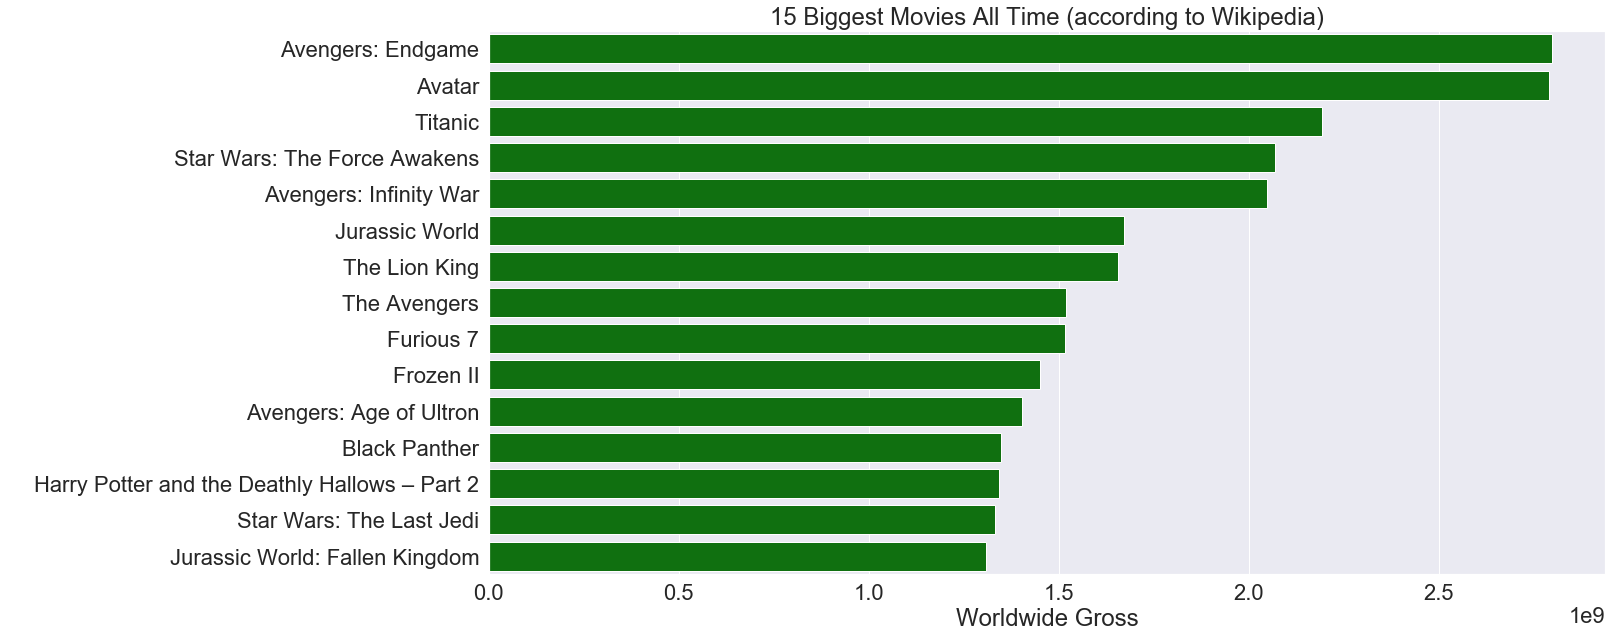

In [58]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="Title", data=top_fifteen, color='green')
plt.xlabel("Worldwide Gross")
plt.ylabel(" ")
plt.title("15 Biggest Movies All Time (according to Wikipedia)")

I forgot to divide the numbers by 1 million. So let's do that and go again.

In [59]:
top_fifteen['Worldwide gross'] = top_fifteen['Worldwide gross']/1000000

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
top_fifteen

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,2797.800564,2019
1,2,1,Avatar,2790.439000,2009
2,3,1,Titanic,2194.439542,1997
3,4,3,Star Wars: The Force Awakens,2068.223624,2015
4,5,4,Avengers: Infinity War,2048.359754,2018
5,6,3,Jurassic World,1671.713208,2015
6,7,7,The Lion King,1656.943394,2019
7,8,3,The Avengers,1518.812988,2012
8,9,4,Furious 7,1516.045911,2015
9,10,10,Frozen II,1450.026933,2019


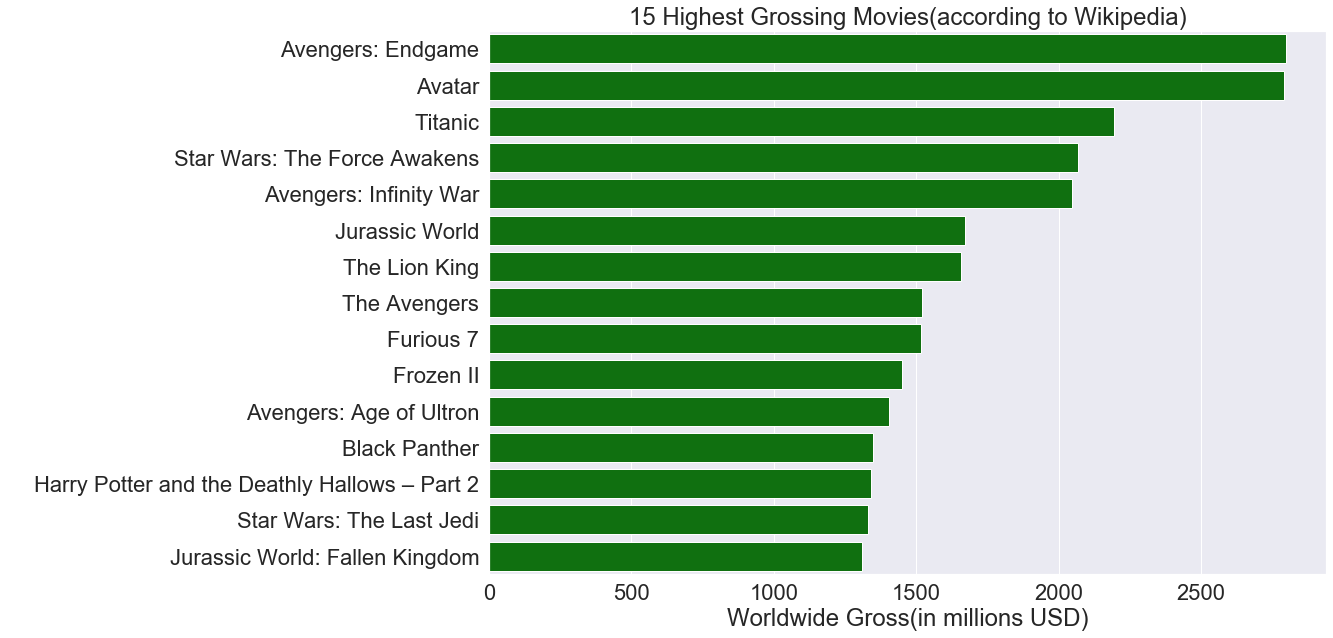

In [172]:
fig,ax=plt.subplots(figsize=(15,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="Title", data=top_fifteen, color='green')
plt.xlabel("Worldwide Gross(in millions USD)")
plt.ylabel(" ")
plt.title("15 Highest Grossing Movies(according to Wikipedia)")
plt.savefig('c:/users/Daniel/Documents/top_fifteen.png')

Text(0.5, 1.0, '15 Highest Grossing Movies(according to Wikipedia)')

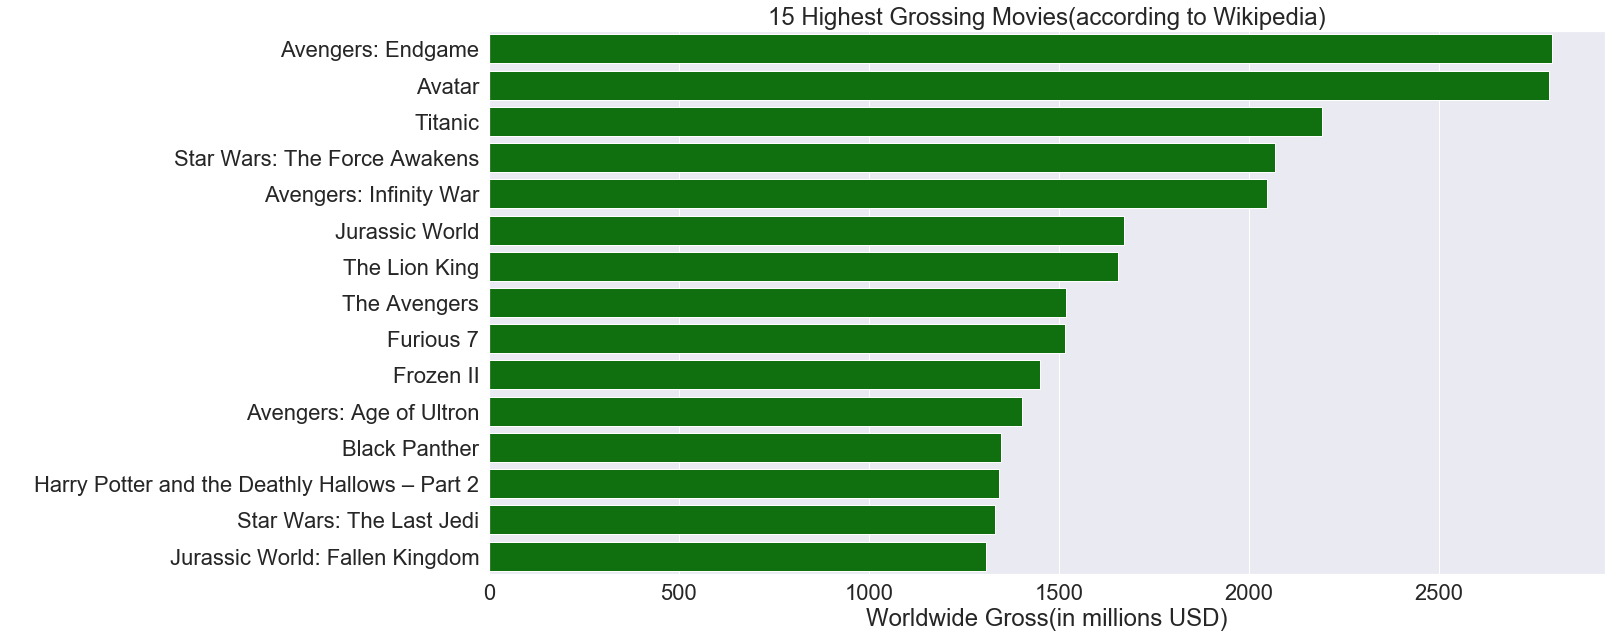

In [174]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="Title", data=top_fifteen, color='green')
plt.xlabel("Worldwide Gross(in millions USD)")
plt.ylabel(" ")
plt.title("15 Highest Grossing Movies(according to Wikipedia)")

In case you're wondering why I did this twice, the first graph showed up with a scroll bar on the side, and I couldn't figure out how to get rid of it, but I reproduced the code in another cell, and it worked just fine.

So we have 4 visualizations technically. Really only 2 (best and worst movies). Now we need to make some conclusions about this data.

Obviously, the biggest conclusion is that sequels do better. Specifically, sequels in the sci-fi/fantasy genre are the way to go. 11 of the top 15 are sequels (you could make the case for 12, because The Lion King is a remake of the animated film, which is sort of a sequel). So let's see if there's anything Microsoft can use to capitalize on this.
But first, I want to go back real quick and look at the 15 biggest bombs, to see if any of them are sequels.

In [60]:
bombs_fift=bombs.sort_values(by=['Est_loss_nom'],ascending=False).head(15)
bombs_fift

,title,year,net_prod_budget,WW_Gross,Est_loss_nom,Est_loss_adj
72,The Lone Ranger,2013,237.5,260.5,175.00,192.5
79,Mortal Engines,2018,110.0,83.7,174.80,178.0
61,John Carter,2012,263.7,284.1,157.00,175.0
64,King Arthur: Legend of the Sword,2017,175.0,148.7,133.60,139.5
115,A Wrinkle in Time,2018,125.0,133.4,130.60,133.0
100,Sinbad: Legend of the Seven Seas,2003,60.0,80.8,125.00,174.0
75,Mars Needs Moms,2011,150.0,39.0,122.00,139.0
106,Terminator: Dark Fate,2019,190.5,261.1,120.00,122.0
108,Tomorrowland,2015,185.0,209.0,120.00,129.5
83,Pan,2015,150.0,128.4,117.50,127.0


Text(0.5, 1.0, '15 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)')

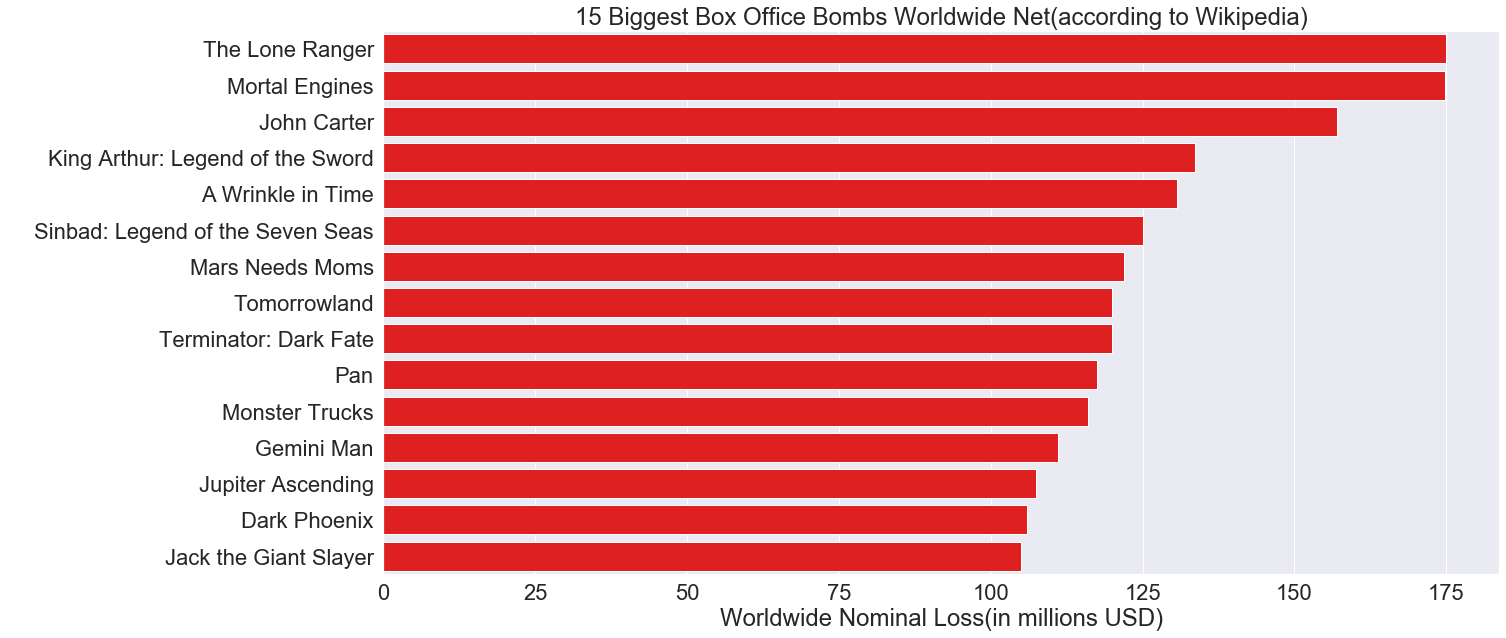

In [117]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Est_loss_nom", y="title", data=bombs_fift, color='red')
plt.xlabel("Worldwide Nominal Loss(in millions USD)")
plt.ylabel(" ")
plt.title("15 Biggest Box Office Bombs Worldwide Net(according to Wikipedia)")

So this does help further my point about sequels. Only 2 of the 15 movies are sequels. So now let's move on to Microsoft, and what it already has that can be used as a movie.

I wasn't able to find any specific data table anywhere of Microsoft's most profitable franchises, so I compiled my own data.
So after scouring the internet, I came across a wikipedia article of the most profitable video game franchises. But since only a few were owned by microsoft, I figured it was easier to just copy the data by hand into a dataframe than to parse all the data and find some suitable entries.

In [120]:
micro_franchises= {'title': ['Elder Scrolls','Halo','Gears of War','Fallout'], 'total_copies_sold':[59,70,26,38],'total_revenue':[3.05,5.0,1.0,1.64]}


In [121]:
micro_fran=pd.DataFrame(micro_franchises,columns=['title','total_copies_sold','total_revenue'])

In [122]:
micro_fran

,title,total_copies_sold,total_revenue
0,Elder Scrolls,59,3.05
1,Halo,70,5.00
2,Gears of War,26,1.00
3,Fallout,38,1.64


In [123]:
micro_fran['games_in_series']=[5,7,5,6]

In [124]:
micro_fran

,title,total_copies_sold,total_revenue,games_in_series
0,Elder Scrolls,59,3.05,5
1,Halo,70,5.00,7
2,Gears of War,26,1.00,5
3,Fallout,38,1.64,6


In [125]:
micro_fran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
title                4 non-null object
total_copies_sold    4 non-null int64
total_revenue        4 non-null float64
games_in_series      4 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 256.0+ bytes


So I decided to add another column to my dataframe:games in series, because there are a number of games out there and that will clearly affect sales numbers. So let's try to make a stacked graph of some of this data.

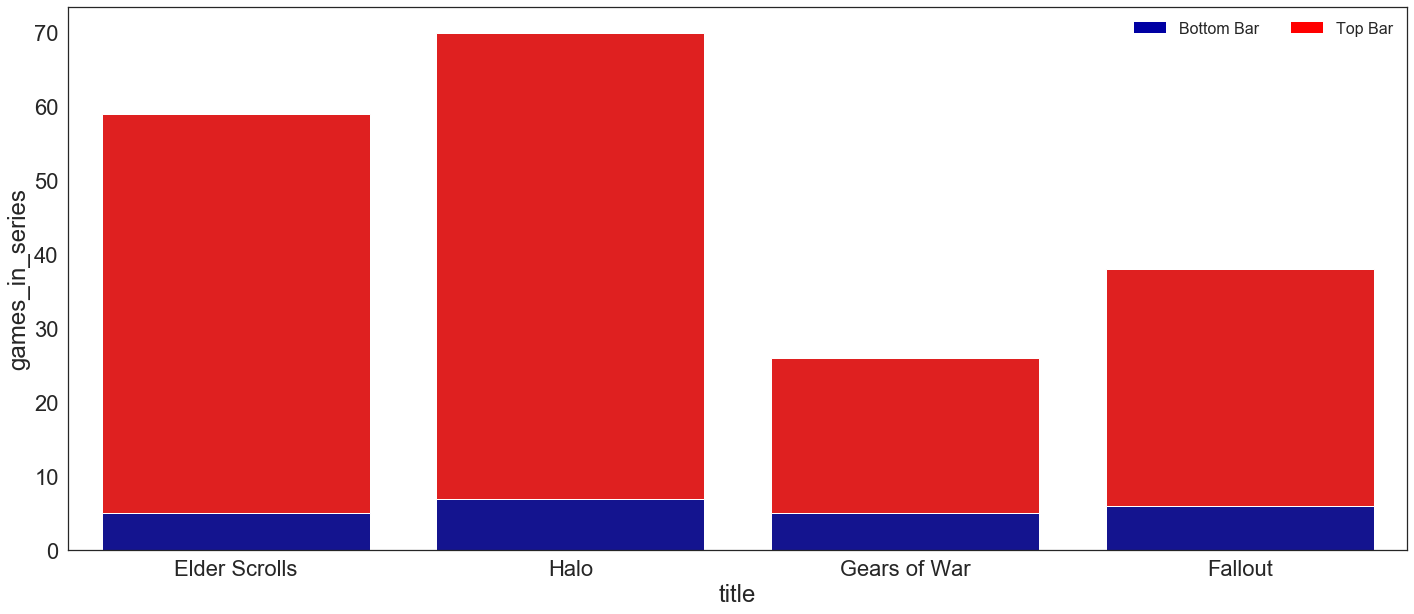

In [126]:
sb.set_style("white")
sb.set_context({"figure.figsize": (24, 10)})
sb.barplot(x = micro_fran.title, y = micro_fran.total_copies_sold, color = "red")
bottom_plot = sb.barplot(x = micro_fran.title, y = micro_fran.games_in_series, color = "#0000A3")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Bottom Bar', 'Top Bar'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)

Ok, this looks terrible.So I think I'll use some different columns.

In [127]:
micro_fran

,title,total_copies_sold,total_revenue,games_in_series
0,Elder Scrolls,59,3.05,5
1,Halo,70,5.00,7
2,Gears of War,26,1.00,5
3,Fallout,38,1.64,6


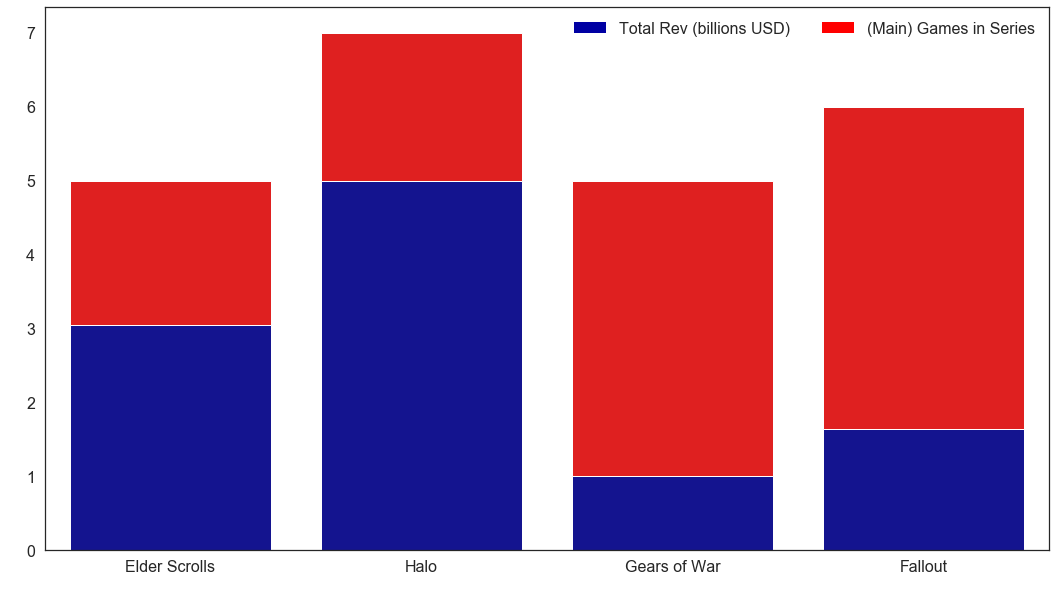

In [128]:
sb.set_style("white")
sb.set_context({"figure.figsize": (18, 10)})
sb.barplot(x = micro_fran.title, y = micro_fran.games_in_series, color = "red")
bottom_plot = sb.barplot(x = micro_fran.title, y = micro_fran.total_revenue, color = "#0000A3")
topbar = plt.Rectangle((0,0),1,1,fc="red", edgecolor = 'none')
bottombar = plt.Rectangle((0,0),1,1,fc='#0000A3',  edgecolor = 'none')
l = plt.legend([bottombar, topbar], ['Total Rev (billions USD)', '(Main) Games in Series'], loc=1, ncol = 2, prop={'size':16})
l.draw_frame(False)
plt.ylabel(" ")
plt.xlabel(" ")
for item in ([bottom_plot.xaxis.label, bottom_plot.yaxis.label] +
             bottom_plot.get_xticklabels() + bottom_plot.get_yticklabels()):
    item.set_fontsize(16)

Much better. So this gives a sense of how profitable these franchises are. So even tough Halo sold $2 Billion more than it's closest competitor (Elder Scrolls), that can be attributed to the fact that there are 2 more Halo main games. But it seems like Halo or Elder Scrolls would be the way to go.
So now let's just make a simple graph for the copies sold. I went through all the trouble of finding these numbers, no reason to keep them to myself.

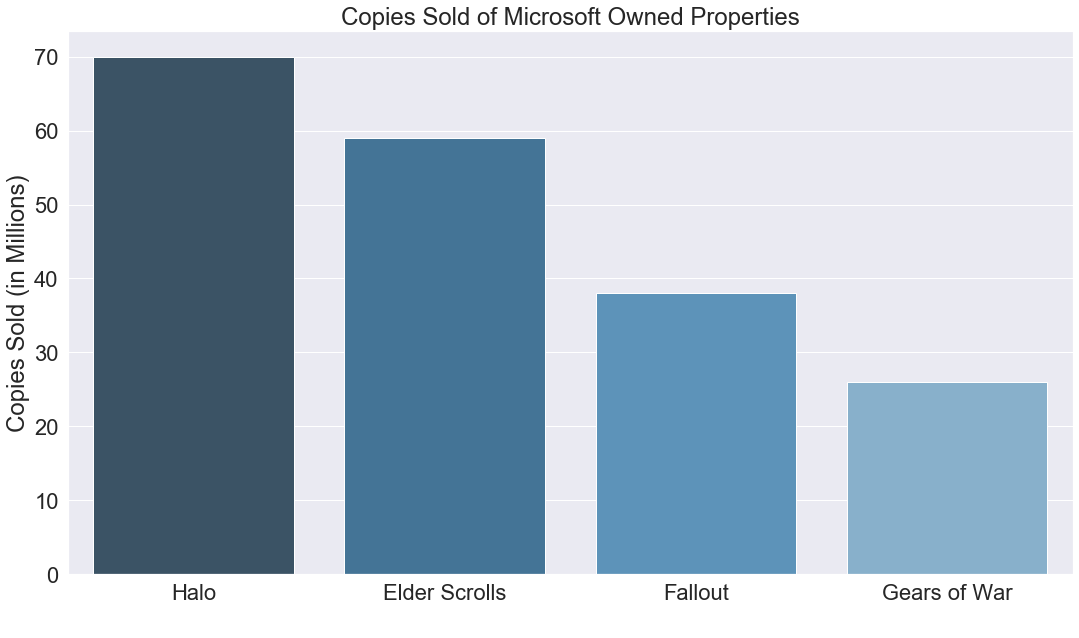

In [129]:
micro_copies=micro_fran.sort_values(by=['total_copies_sold'],ascending=False)
sb.set(font_scale=2) 
sb.barplot(x = micro_copies.title, y = micro_copies.total_copies_sold, palette="Blues_d")
plt.xlabel(" ")
plt.ylabel("Copies Sold (in Millions)")
plt.title("Copies Sold of Microsoft Owned Properties")
plt.show()

That's another nice looking graph. So we've established that there are some very profitable Microsoft properties out there. Even changed the color palette just to be different.
From what I know of these series, Elder Scrolls and Fallout are more character driven, whereas Halo and Gear of War are more action driven. So that would suggest that Elder Scrolls and Fallout have more in terms of story available. Of course there are also a library of Halo books out there to pick from for a movie.
There is also the issue of Elder Scrolls being viewed as too similar to the Netflix series "The Witcher". However that doesn't necessarily mean that an Elder Scrolls movie (or series) would be a failure. Deep Impact came out May 8, 1998, almost 2 months prior to Armageddon (June 30, 1998), but Armageddon did better at the box office (349.5MM vs 553.7MM) although when you consider the budget (75MM vs 140MM), Deep Impact had a better ROI.

So let's shift gears a little, and start looking at video game franchises turned into movies. Again, I decided to manually create a dataframe for this, and then make nice looking graph as well.

In [130]:
video_game_prop={'title':['Warcraft','Detective Pikachu','Rampage','The Angry Birds Movie','Prince Of Persia: The Sands Of Time',
                         'Resident Evil: The Final Chapter','Sonic The Hedgehog','Resident Evil: Afterlife','Lara Croft: Tomb Raider',
                         'Tomb Raider'],'year':[2016,2019,2018,2016,2010,2016,2020,2010,2001,2018],'ww_gross':[439,433,428,352,336,314,306,
                                                                                                           300,274,274]}

In [131]:
vg_fran=pd.DataFrame(video_game_prop,columns=['title','year','ww_gross'])

In [132]:
vg_fran

,title,year,ww_gross
0,Warcraft,2016,439
1,Detective Pikachu,2019,433
2,Rampage,2018,428
3,The Angry Birds Movie,2016,352
4,Prince Of Persia: The Sands Of Time,2010,336
5,Resident Evil: The Final Chapter,2016,314
6,Sonic The Hedgehog,2020,306
7,Resident Evil: Afterlife,2010,300
8,Lara Croft: Tomb Raider,2001,274
9,Tomb Raider,2018,274


I added a column for the year, I'm not sure if that'll be helpful, but because the last 2 movies are both Tomb Raider, I thought it a good idea to have another differentiating factor in there. So let's look at that graph.

Text(0.5, 1.0, '10 Biggest Video Game Movies All Time')

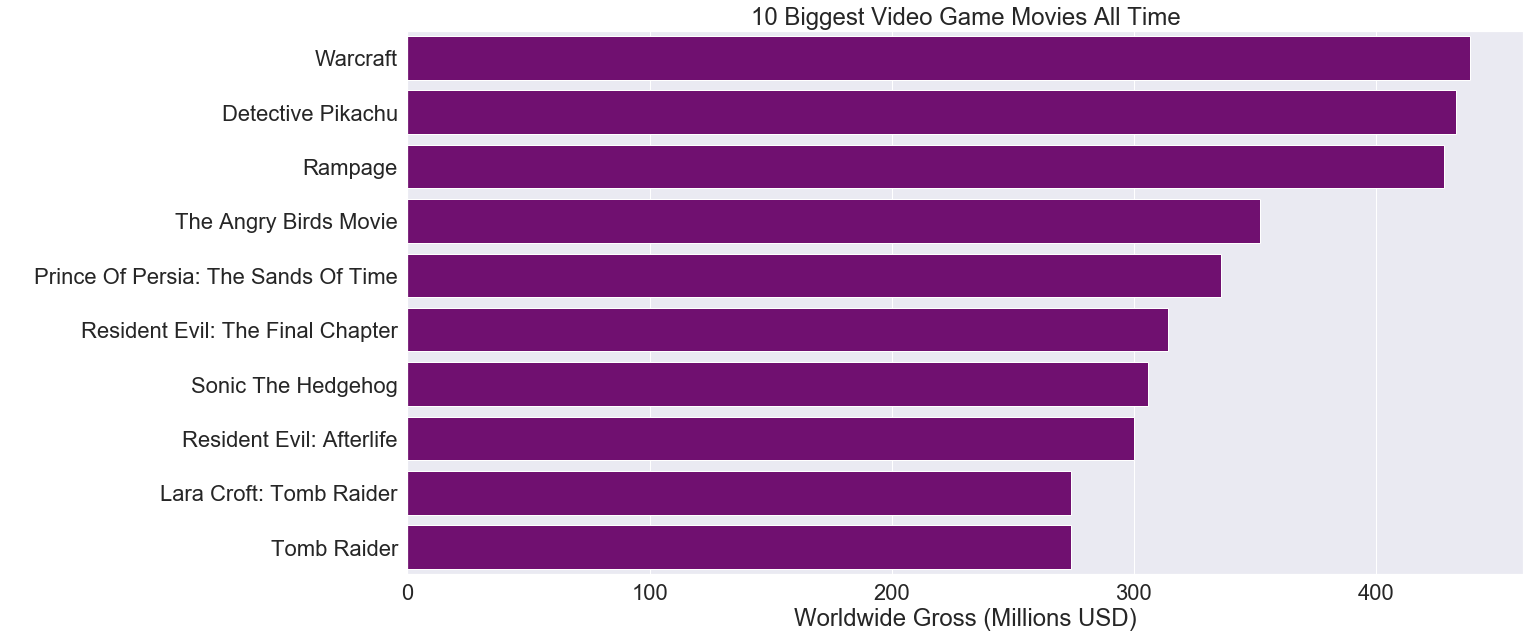

In [133]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="ww_gross", y="title", data=vg_fran, color='purple')
plt.xlabel("Worldwide Gross (Millions USD)")
plt.ylabel(" ")
plt.title("10 Biggest Video Game Movies All Time")

Ok, so there's evidence here that there is money in video game based movies, really just about any video game. Also, there are 2 Resident Evil movies on the list. That goes to my earlier theory that sequels are the best way to make money in movies.So for a third time, I decided to compile data on Resident Evil movies.

In [134]:
res_evil_movies={'title':['The Final Chapter','Retribution','Afterlife','Extinction',
                          'Apocalypse','Resident Evil'],'year':[2017,2012,2010,2007,2004,2002],
                'prod_budget':[40.0,65.0,57.5,45.0,50.0,35.0],
                'ww_gross':[314.1,240.6,295.9,149.9,125.2,103.8]}

In [135]:
re_fran=pd.DataFrame(res_evil_movies,columns=['title','year','prod_budget','ww_gross'])

In [136]:
re_fran

,title,year,prod_budget,ww_gross
0,The Final Chapter,2017,40.0,314.1
1,Retribution,2012,65.0,240.6
2,Afterlife,2010,57.5,295.9
3,Extinction,2007,45.0,149.9
4,Apocalypse,2004,50.0,125.2
5,Resident Evil,2002,35.0,103.8


Ok, so here's another dataframe containing info on the Resident Evil movie franchise. It's certainly the highest grossing franchise based on a video game (live-action), also I do believe it will show a trend that the sequels make more money than the previous movie.

In [137]:
re_fran_yr=re_fran.sort_values(by=['year'],ascending=False)
re_fran_yr

,title,year,prod_budget,ww_gross
0,The Final Chapter,2017,40.0,314.1
1,Retribution,2012,65.0,240.6
2,Afterlife,2010,57.5,295.9
3,Extinction,2007,45.0,149.9
4,Apocalypse,2004,50.0,125.2
5,Resident Evil,2002,35.0,103.8


Text(0.5, 1.0, 'Resident Evil movie gross by year')

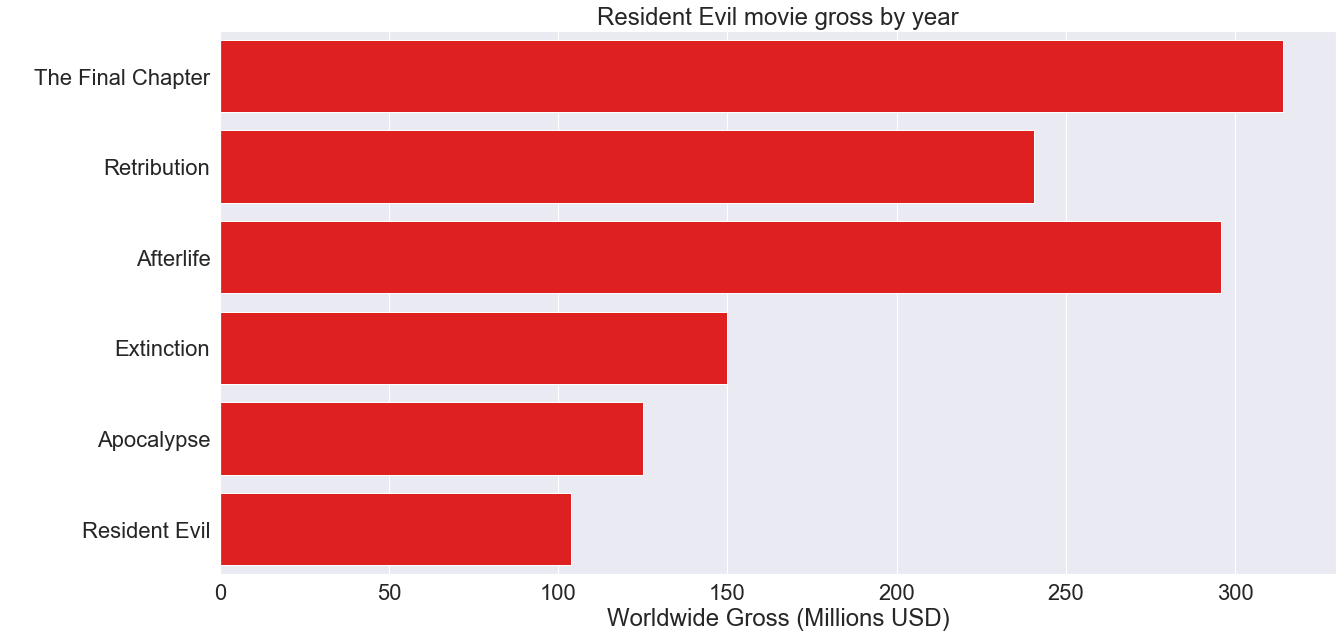

In [138]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="ww_gross", y="title", data=re_fran_yr, color='red')
plt.xlabel("Worldwide Gross (Millions USD)")
plt.ylabel(" ")
plt.title("Resident Evil movie gross by year")


So that's not a bad looking graph, per se. But there is a better way to convey this data. So let's try a line graph.

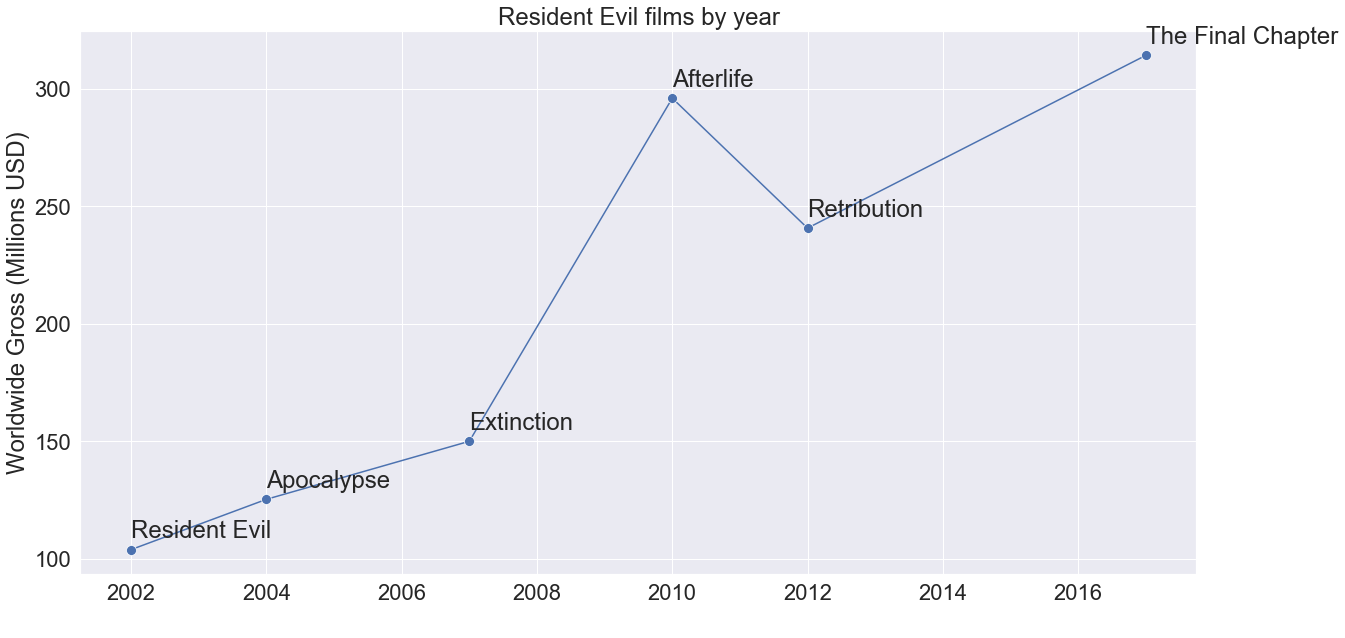

In [142]:
plt.figure(figsize=(20,10))
ax1=plt.gca()
sb.lineplot(x="year", y="ww_gross", marker='o',data=re_fran_yr,markersize=10)

for row in re_fran_yr.index:
    name=re_fran_yr['title'][row]
    x=re_fran_yr['year'][row]
    y=re_fran_yr['ww_gross'][row]
    ax1.annotate(name,(x,y+5))

plt.xlabel("  ")
plt.title("Resident Evil films by year")
plt.ylabel("Worldwide Gross (Millions USD)")
plt.show()

Aside from 1 outlier, there is a clear trend that the Resident Evil movies made more money with each chapter. In fact, every sequel made more than the original, and 4 out of 5 made more than the previous movie. This further solidifies my argument that sequels are the best way to make money in movies.

Ok, so let's keep working on sequels. Here, I've found a nice wikipedia article on sequels by box office performance. Let's read it and go through the standard formatting.

In [143]:
resp3= requests.get("https://en.wikipedia.org/wiki/List_of_film_sequels_by_box-office_performance")

In [144]:
soup3= bsoup(resp3.text)
seqs_table=soup3.find_all('table', {'class':'wikitable'})

In [145]:
seqs_table[2]

<table class="sortable wikitable">
<tbody><tr>
<th align="left" width="280">Title
</th>
<th align="left" width="60">Year
</th>
<th align="left" width="120">Worldwide gross<sup class="reference" id="cite_ref-TheNumbersSequelsWorldWide_49-0"><a href="#cite_note-TheNumbersSequelsWorldWide-49">[49]</a></sup>
</th></tr>
<tr>
<td align="left"><i><a href="/wiki/Avengers:_Endgame" title="Avengers: Endgame">Avengers: Endgame</a></i>
</td>
<td align="left">2019
</td>
<td align="left">$2,797,800,564
</td></tr>
<tr>
<td align="left"><i><a href="/wiki/Star_Wars:_The_Force_Awakens" title="Star Wars: The Force Awakens">Star Wars: The Force Awakens</a></i>
</td>
<td align="left">2015
</td>
<td align="left">$2,068,223,624
</td></tr>
<tr>
<td align="left"><i><a href="/wiki/Avengers:_Infinity_War" title="Avengers: Infinity War">Avengers: Infinity War</a></i>
</td>
<td align="left">2018
</td>
<td align="left">$2,048,359,754
</td></tr>
<tr>
<td align="left"><i><a href="/wiki/Jurassic_World" title="Jurassic

In [146]:
seqs=seqs_table[2]

In [147]:
seqs

<table class="sortable wikitable">
<tbody><tr>
<th align="left" width="280">Title
</th>
<th align="left" width="60">Year
</th>
<th align="left" width="120">Worldwide gross<sup class="reference" id="cite_ref-TheNumbersSequelsWorldWide_49-0"><a href="#cite_note-TheNumbersSequelsWorldWide-49">[49]</a></sup>
</th></tr>
<tr>
<td align="left"><i><a href="/wiki/Avengers:_Endgame" title="Avengers: Endgame">Avengers: Endgame</a></i>
</td>
<td align="left">2019
</td>
<td align="left">$2,797,800,564
</td></tr>
<tr>
<td align="left"><i><a href="/wiki/Star_Wars:_The_Force_Awakens" title="Star Wars: The Force Awakens">Star Wars: The Force Awakens</a></i>
</td>
<td align="left">2015
</td>
<td align="left">$2,068,223,624
</td></tr>
<tr>
<td align="left"><i><a href="/wiki/Avengers:_Infinity_War" title="Avengers: Infinity War">Avengers: Infinity War</a></i>
</td>
<td align="left">2018
</td>
<td align="left">$2,048,359,754
</td></tr>
<tr>
<td align="left"><i><a href="/wiki/Jurassic_World" title="Jurassic

In [148]:
seq=pd.read_html(seqs.prettify())[0]

In [149]:
seq

,Title,Year,Worldwide gross [49]
0,Avengers: Endgame,2019,"$2,797,800,564"
1,Star Wars: The Force Awakens,2015,"$2,068,223,624"
2,Avengers: Infinity War,2018,"$2,048,359,754"
3,Jurassic World,2015,"$1,670,400,637"
4,Furious 7,2015,"$1,518,722,794"
5,Frozen II,2019,"$1,448,203,157"
6,Avengers: Age Of Ultron,2015,"$1,396,099,202"
7,Harry Potter and the Deathly Hallows – Part 2,2011,"$1,356,602,810 [50]"
8,Star Wars: The Last Jedi,2017,"$1,332,539,889"
9,Jurassic World: Fallen Kingdom,2018,"$1,308,470,988"


So there's one problem with this, every so often there's a bracketed number appearing. We'll have to get rid of that. However, the first thing we'll do is get rid of the $.

In [150]:
seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Title                    30 non-null object
Year                     30 non-null int64
Worldwide gross  [49]    30 non-null object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [151]:
new_col=['title','year','Worldwide gross']

In [152]:
seq.columns=new_col

In [153]:
seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
title              30 non-null object
year               30 non-null int64
Worldwide gross    30 non-null object
dtypes: int64(1), object(2)
memory usage: 848.0+ bytes


In [154]:
seq['Worldwide gross'] = seq['Worldwide gross'].replace('[\$,]', '', regex=True)
seq.head(15)

,title,year,Worldwide gross
0,Avengers: Endgame,2019,2797800564
1,Star Wars: The Force Awakens,2015,2068223624
2,Avengers: Infinity War,2018,2048359754
3,Jurassic World,2015,1670400637
4,Furious 7,2015,1518722794
5,Frozen II,2019,1448203157
6,Avengers: Age Of Ultron,2015,1396099202
7,Harry Potter and the Deathly Hallows – Part 2,2011,1356602810 [50]
8,Star Wars: The Last Jedi,2017,1332539889
9,Jurassic World: Fallen Kingdom,2018,1308470988


So the $ is gone, now we need to get rid of those bracketed numbers. The easiest way (to me anyway) would be just to overwrite those 2 with new numbers, instead of writing another function or for loop. But this program is about writing code, so let's try it that way. I'll go through the same steps when I was getting rid of the ranges of numbers. So step 1, let's see what it actually looks like.

In [155]:
seq['Worldwide gross'][7]

'1356602810  [50]'

In [156]:
seq['Worldwide gross'][7].split(' ')

['1356602810', '', '[50]']

Splitting it at the space seems like the smart way to go. So again it creates a  list, I can just take the first element of that list, and put that into the dataframe. Seems simple enough.

In [157]:
bleh=seq['Worldwide gross'][7].split(' ')

I lran out of good names for variables.

In [158]:
bleh[0]

'1356602810'

So now to put it back where we got it in the dataframe. I bet we'll get a warning.

In [160]:
seq['Worldwide gross'][7]=bleh[0]

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Told you.

In [161]:
seq

,title,year,Worldwide gross
0,Avengers: Endgame,2019,2797800564
1,Star Wars: The Force Awakens,2015,2068223624
2,Avengers: Infinity War,2018,2048359754
3,Jurassic World,2015,1670400637
4,Furious 7,2015,1518722794
5,Frozen II,2019,1448203157
6,Avengers: Age Of Ultron,2015,1396099202
7,Harry Potter and the Deathly Hallows – Part 2,2011,1356602810
8,Star Wars: The Last Jedi,2017,1332539889
9,Jurassic World: Fallen Kingdom,2018,1308470988


But again, it worked. So I'll write another simple function to take the variable, and if it contains a bracket, it'll split it into a list, then return the first element of the list as a float.

In [162]:
def change2 (var1):
    if '[' in var1:
        bleh=var1.split(' ')
        numb=bleh[0]
        numbf=float(numb)
    else:
        numbf=float(var1)
    return numbf

In [163]:
seq['Worldwide gross'] = seq['Worldwide gross'].map(change2)

In [164]:
seq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
title              30 non-null object
year               30 non-null int64
Worldwide gross    30 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 848.0+ bytes


Did anyone else find it weird there weren't any warnings that time?

In [165]:
seq.head()

,title,year,Worldwide gross
0,Avengers: Endgame,2019,2.797801e+09
1,Star Wars: The Force Awakens,2015,2.068224e+09
2,Avengers: Infinity War,2018,2.048360e+09
3,Jurassic World,2015,1.670401e+09
4,Furious 7,2015,1.518723e+09


Ok, so another successful function and numbers are now numbers. But again, they're pretty big. So let's divide by a million again.

In [166]:
seq['Worldwide gross'] = seq['Worldwide gross']/1000000

In [167]:
seq.head()

,title,year,Worldwide gross
0,Avengers: Endgame,2019,2797.800564
1,Star Wars: The Force Awakens,2015,2068.223624
2,Avengers: Infinity War,2018,2048.359754
3,Jurassic World,2015,1670.400637
4,Furious 7,2015,1518.722794


We have another very nice dataframe with pretty manageable numbers. So let's get graphing. First, let's make a new dataframe of just the top ten titles:

In [168]:
seq_tf=seq.head(15)

Text(0.5, 1.0, '15 Highest Grossing Sequels')

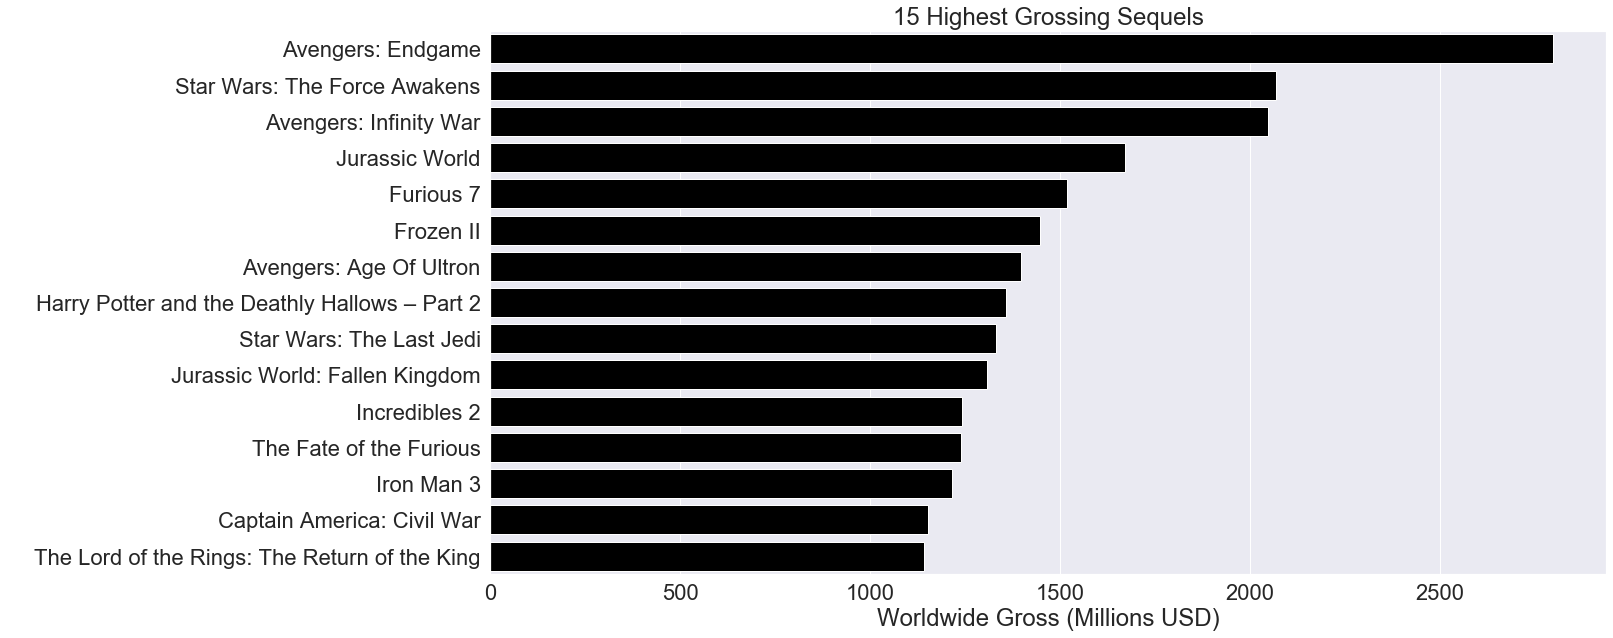

In [169]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Worldwide gross", y="title", data=seq_tf, color='black')
plt.xlabel("Worldwide Gross (Millions USD)")
plt.ylabel(" ")
plt.title("15 Highest Grossing Sequels")


So not only does this show that sequels are profitable, several of these movies (12 of 15) are not the first sequel, or the second in the series, however you want to look at it.
So I think that should be enough data for a minimum viable product. I have several visualizations, and I think I've made a pretty convincing point.

So for some future considerations: I would like to look into how comparably storied movies do against each other (Armageddon vs Deep Impact, White House Down vs Olympas has Fallen, etc.) because I'm concerned that an Elder Scrolls movie, or series, would be seen as too similar to The Witcher.
I'd also like to look at how the Star Wars movies have done over time, I'm betting it'll be similar to the Resident Evil graph. Maybe do that for the James Bond movies as well.
Then of course there are issues of writers, directors and producers. But so much of that data is skewed by 1 or 2 giant movies, or by having a giant library of films. So alot of parsing or normalizing of the data would need to happen.

# More Data:

After the initial draft was presented, it was decided more data was needed. Specifically, genre data. So let's find some, and merge it with some of our other data.

So I found a nice website with some movie gross by genre, so let's do some more webscrapping:

In [65]:
resp4=requests.get("https://www.the-numbers.com/market/genres")

In [66]:
soup4= bsoup(resp4.text)

In [67]:
print(soup4.prettify())

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=UA-1343128-1">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-1343128-1');
  </script>
  <meta content='(PICS-1.1 "https://www.icra.org/ratingsv02.html" l gen true for "https://www.the-numbers.com/" r (cb 1 lz 1 nz 1 oz 1 vz 1) "https://www.rsac.org/ratingsv01.html" l gen true for "https://www.the-numbers.com/" r (n 0 s 0 v 0 l 0))' http-equiv="PICS-Label"/>
  <!--<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" >-->
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="telephone=no" name="format-detection"/>
  <!-- for apple mobile -->
  <meta content="521546213" property="fb:admins"/>
  <m

Well, again, this is something. I was having a little trouble getting that to work, but here we are.

In [68]:
tops_genre=soup4.find('table')

In [69]:
tops_genre

<table>
<tr><th>Rank</th><th>Genre</th><th>Movies</th><th>Total Box Office</th><th>Tickets</th><th>Share</th></tr>
<tr>
<td class="data">1</td>
<td><b><a href="/market/genre/Adventure">Adventure</a></b></td>
<td class="data">1,072</td>
<td class="data">$64,019,455,370</td>
<td class="data">9,166,630,074</td>
<td class="data">27.30%</td>
</tr>
<tr>
<td class="data">2</td>
<td><b><a href="/market/genre/Action">Action</a></b></td>
<td class="data">1,045</td>
<td class="data">$47,322,441,631</td>
<td class="data">6,701,725,205</td>
<td class="data">20.18%</td>
</tr>
<tr>
<td class="data">3</td>
<td><b><a href="/market/genre/Drama">Drama</a></b></td>
<td class="data">5,392</td>
<td class="data">$36,418,510,440</td>
<td class="data">5,594,590,517</td>
<td class="data">15.53%</td>
</tr>
<tr>
<td class="data">4</td>
<td><b><a href="/market/genre/Comedy">Comedy</a></b></td>
<td class="data">2,372</td>
<td class="data">$34,076,297,750</td>
<td class="data">5,236,625,709</td>
<td class="data">14.

In [70]:
genre_tops=pd.read_html(tops_genre.prettify())[0]

In [71]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1072,"$64,019,455,370",9166630074,27.30%
1,2,Action,1045,"$47,322,441,631",6701725205,20.18%
2,3,Drama,5392,"$36,418,510,440",5594590517,15.53%
3,4,Comedy,2372,"$34,076,297,750",5236625709,14.53%
4,5,Thriller/Suspense,1154,"$20,128,219,034",2909456488,8.58%
5,6,Horror,646,"$12,343,590,725",1779683558,5.26%
6,7,Romantic Comedy,609,"$10,191,961,367",1642865017,4.35%
7,8,Musical,194,"$4,156,548,159",548331938,1.77%
8,9,Documentary,2365,"$2,495,917,609",373571393,1.06%
9,10,Black Comedy,194,"$1,626,571,916",227624063,0.69%


Ok, so this data is awesomely clean, so I don't think I need to do much here. I can probably do a graph, and get some figures on gross per movie. But I need to merge something with something else. So let's find something.

In [72]:
resp5=requests.get("https://www.the-numbers.com/box-office-records/worldwide/all-movies/genres/")

In [73]:
soup5= bsoup(resp5.text)

In [74]:
ww_genre=soup5.find('table')

In [75]:
genre_ww=pd.read_html(ww_genre.prettify())[0]

In [76]:
genre_ww

,Record,No 1. Movie,Amount
0,Top Adventure Worldwide,Star Wars Ep. VII: The Force Awakens,"$2,065,478,084"
1,Top Action Worldwide,Avengers: Endgame,"$2,797,800,564"
2,Top Comedy Worldwide,The Hangover Part II,"$586,464,305"
3,Top Drama Worldwide,Titanic,"$2,207,986,545"
4,Top Thriller/Suspense Worldwide,Joker,"$1,072,507,517"
5,Top Horror Worldwide,It,"$701,720,047"
6,Top Romantic Comedy Worldwide,Mei Ren Yu,"$525,018,479"
7,Top Musical Worldwide,Frozen,"$1,268,229,252"
8,Top Documentary Worldwide,Michael Jackson's This Is It,"$252,091,016"
9,Top Western Worldwide,Django Unchained,"$449,841,566"


Well, it does look like most of the work is done for us. I was thinking about adding a genre column to my highest grossing movies table.

In [77]:
top_fifteen

,Rank,Peak,Title,Worldwide gross,Year
0,1,1,Avengers: Endgame,2797.800564,2019
1,2,1,Avatar,2790.439000,2009
2,3,1,Titanic,2194.439542,1997
3,4,3,Star Wars: The Force Awakens,2068.223624,2015
4,5,4,Avengers: Infinity War,2048.359754,2018
5,6,3,Jurassic World,1671.713208,2015
6,7,7,The Lion King,1656.943394,2019
7,8,3,The Avengers,1518.812988,2012
8,9,4,Furious 7,1516.045911,2015
9,10,10,Frozen II,1450.026933,2019


The problem is, I don't have any table that has all these titles and their genre. So let's find one. We'll start with the provided files.

In [79]:
imdb_rat.head(15)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
5,tt1069246,6.2,326
6,tt1094666,7.0,1613
7,tt1130982,6.4,571
8,tt1156528,7.2,265
9,tt1161457,4.2,148


Ok, so that's not very helpful, to put it mildly.

In [80]:
rot_tom.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


Also, quite useless, I'm beginning to see why I never used these.

In [81]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


Well, this one at least has movie titles in it, so that's something. Genre_ids might be useful, but there are several entries per title (I mean, pick a lane, will ya?), so I don't know what I can do with that. Let's look at the net.Wow, so there ARE tables of movies by genre, but they are B-I-G BIG. So good news, most of these movies were released in the last 10 years (stupid Titanic), so maybe I can find a list of movies by genre from 2010-2020. I can't, so it's time to cheat a little: we already know the genres of these movies, right? So let's just import tables of Action, Adventure, Sci-Fi, Romance(might need to check on that).

So I managed to find a number of lists of movies belonging to a particular genre. This is going to be a lot more work than I expected, but c'est la vie.

In [82]:
resp6=requests.get("https://www.the-numbers.com/market/genre/Drama")
soup6= bsoup(resp6.text)
tbl_drama=soup6.find('table')
drama=pd.read_html(tbl_drama.prettify())[0]

In [83]:
drama

,Rank,Movie,Release Date,Theatrical Distributor,MPAA Rating,Total Gross,Inflation-Adjusted Gross
0,1,Titanic,"Dec 19, 1997",Paramount Pictures,PG-13,"$659,363,944","$1,240,601,558"
1,2,The Passion of the Christ,"Feb 25, 2004",Newmarket Films,R,"$370,782,930","$543,911,111"
2,3,Saving Private Ryan,"Jul 24, 1998",Dreamworks SKG,R,"$216,335,085","$416,376,522"
3,4,American Sniper,"Dec 25, 2014",Warner Bros.,R,"$350,126,372","$378,445,725"
4,5,Apollo 13,"Jun 30, 1995",Universal,PG,"$173,772,767","$362,988,651"
5,6,The Twilight Saga: New Moon,"Nov 20, 2009",Summit Entertainment,PG-13,"$296,623,634","$359,778,351"
6,7,The Twilight Saga: Eclipse,"Jun 30, 2010",Summit Entertainment,PG-13,"$300,531,751","$347,001,804"
7,8,The Twilight Saga: Breaking Dawn…,"Nov 16, 2012",Lionsgate,PG-13,"$292,324,737","$334,481,193"
8,9,The Twilight Saga: Breaking Dawn…,"Nov 18, 2011",Summit Entertainment,PG-13,"$281,287,133","$323,118,299"
9,10,The Perfect Storm,"Jun 30, 2000",Warner Bros.,PG-13,"$182,618,434","$308,655,646"


I think I can get away with just using the top 5, since only 1 of these movies appears in my top 15.

In [84]:
drama5=drama.head()
drama5

,Rank,Movie,Release Date,Theatrical Distributor,MPAA Rating,Total Gross,Inflation-Adjusted Gross
0,1,Titanic,"Dec 19, 1997",Paramount Pictures,PG-13,"$659,363,944","$1,240,601,558"
1,2,The Passion of the Christ,"Feb 25, 2004",Newmarket Films,R,"$370,782,930","$543,911,111"
2,3,Saving Private Ryan,"Jul 24, 1998",Dreamworks SKG,R,"$216,335,085","$416,376,522"
3,4,American Sniper,"Dec 25, 2014",Warner Bros.,R,"$350,126,372","$378,445,725"
4,5,Apollo 13,"Jun 30, 1995",Universal,PG,"$173,772,767","$362,988,651"


Ok,so I'm kind of at a dead end looking for genres, but what I can do, is work with some of the data I have. Namely the genre box office numbers.

In [85]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1072,"$64,019,455,370",9166630074,27.30%
1,2,Action,1045,"$47,322,441,631",6701725205,20.18%
2,3,Drama,5392,"$36,418,510,440",5594590517,15.53%
3,4,Comedy,2372,"$34,076,297,750",5236625709,14.53%
4,5,Thriller/Suspense,1154,"$20,128,219,034",2909456488,8.58%
5,6,Horror,646,"$12,343,590,725",1779683558,5.26%
6,7,Romantic Comedy,609,"$10,191,961,367",1642865017,4.35%
7,8,Musical,194,"$4,156,548,159",548331938,1.77%
8,9,Documentary,2365,"$2,495,917,609",373571393,1.06%
9,10,Black Comedy,194,"$1,626,571,916",227624063,0.69%


In [86]:
genre_tops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
Rank                14 non-null int64
Genre               14 non-null object
Movies              14 non-null int64
Total Box Office    14 non-null object
Tickets             14 non-null int64
Share               14 non-null object
dtypes: int64(3), object(3)
memory usage: 800.0+ bytes


Ok, so let's get rid of the $ and make the box office a number.

In [89]:
genre_tops['Total Box Office'] = genre_tops['Total Box Office'].replace('[\$,]', '', regex=True)
genre_tops['Total Box Office'] = genre_tops['Total Box Office'].astype(float)
genre_tops['Total Box Office'] = genre_tops['Total Box Office']/1000000

In [90]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share
0,1,Adventure,1072,64019.455370,9166630074,27.30%
1,2,Action,1045,47322.441631,6701725205,20.18%
2,3,Drama,5392,36418.510440,5594590517,15.53%
3,4,Comedy,2372,34076.297750,5236625709,14.53%
4,5,Thriller/Suspense,1154,20128.219034,2909456488,8.58%
5,6,Horror,646,12343.590725,1779683558,5.26%
6,7,Romantic Comedy,609,10191.961367,1642865017,4.35%
7,8,Musical,194,4156.548159,548331938,1.77%
8,9,Documentary,2365,2495.917609,373571393,1.06%
9,10,Black Comedy,194,1626.571916,227624063,0.69%


In [91]:
genre_tops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
Rank                14 non-null int64
Genre               14 non-null object
Movies              14 non-null int64
Total Box Office    14 non-null float64
Tickets             14 non-null int64
Share               14 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 800.0+ bytes


So let's make a new column, "Gross/Title", that will show how much money is made per movie.

In [92]:
genre_tops["Gross/Title"]=genre_tops["Total Box Office"]/genre_tops["Movies"]

In [93]:
genre_tops

,Rank,Genre,Movies,Total Box Office,Tickets,Share,Gross/Title
0,1,Adventure,1072,64019.455370,9166630074,27.30%,59.719641
1,2,Action,1045,47322.441631,6701725205,20.18%,45.284633
2,3,Drama,5392,36418.510440,5594590517,15.53%,6.754175
3,4,Comedy,2372,34076.297750,5236625709,14.53%,14.366061
4,5,Thriller/Suspense,1154,20128.219034,2909456488,8.58%,17.442131
5,6,Horror,646,12343.590725,1779683558,5.26%,19.107726
6,7,Romantic Comedy,609,10191.961367,1642865017,4.35%,16.735569
7,8,Musical,194,4156.548159,548331938,1.77%,21.425506
8,9,Documentary,2365,2495.917609,373571393,1.06%,1.055356
9,10,Black Comedy,194,1626.571916,227624063,0.69%,8.384391


In [94]:
genre_tops_per=genre_tops.sort_values(by=["Gross/Title"],ascending=False)
genre_tops_per

,Rank,Genre,Movies,Total Box Office,Tickets,Share,Gross/Title
0,1,Adventure,1072,64019.455370,9166630074,27.30%,59.719641
1,2,Action,1045,47322.441631,6701725205,20.18%,45.284633
7,8,Musical,194,4156.548159,548331938,1.77%,21.425506
5,6,Horror,646,12343.590725,1779683558,5.26%,19.107726
4,5,Thriller/Suspense,1154,20128.219034,2909456488,8.58%,17.442131
6,7,Romantic Comedy,609,10191.961367,1642865017,4.35%,16.735569
3,4,Comedy,2372,34076.297750,5236625709,14.53%,14.366061
10,11,Western,84,1151.006490,165133802,0.49%,13.702458
9,10,Black Comedy,194,1626.571916,227624063,0.69%,8.384391
2,3,Drama,5392,36418.510440,5594590517,15.53%,6.754175


So this is something. I can make a nice graph of movie gross by genre.

Text(0.5, 1.0, 'Highest Grossing Genres per Movie')

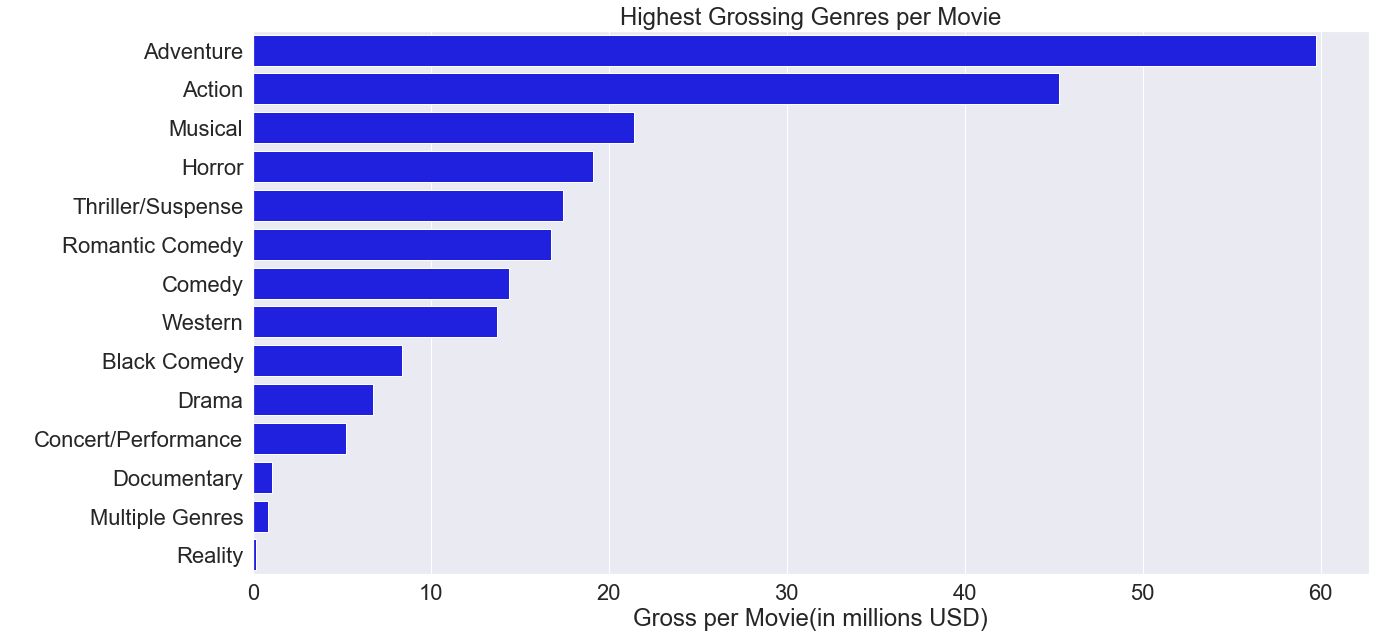

In [95]:
fig,ax=plt.subplots(figsize=(20,10))
sb.set(font_scale=2)
ax = sb.barplot(x="Gross/Title", y="Genre", data=genre_tops_per, color='blue')
plt.xlabel("Gross per Movie(in millions USD)")
plt.ylabel(" ")
plt.title("Highest Grossing Genres per Movie")

I'm getting pretty good at making that particular kind of graph. It might be better as a pie chart. Ok, so let's cheat a little: I can add a genre column to my drama dataframe, and they'll all be 'drama'.

In [96]:
drama5

,Rank,Movie,Release Date,Theatrical Distributor,MPAA Rating,Total Gross,Inflation-Adjusted Gross
0,1,Titanic,"Dec 19, 1997",Paramount Pictures,PG-13,"$659,363,944","$1,240,601,558"
1,2,The Passion of the Christ,"Feb 25, 2004",Newmarket Films,R,"$370,782,930","$543,911,111"
2,3,Saving Private Ryan,"Jul 24, 1998",Dreamworks SKG,R,"$216,335,085","$416,376,522"
3,4,American Sniper,"Dec 25, 2014",Warner Bros.,R,"$350,126,372","$378,445,725"
4,5,Apollo 13,"Jun 30, 1995",Universal,PG,"$173,772,767","$362,988,651"


In [99]:
drama5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 7 columns):
Rank                         5 non-null object
Movie                        5 non-null object
Release  Date                5 non-null object
Theatrical  Distributor      5 non-null object
MPAA  Rating                 5 non-null object
Total Gross                  5 non-null object
Inflation-Adjusted  Gross    5 non-null object
dtypes: object(7)
memory usage: 408.0+ bytes


So what I want to do is make a loop (to save typing, I guess) that'll just toss in a column "Genre" and add the value "Drama" to this dataframe.

In [102]:
len(drama5)

5

In [105]:
type(drama5["Movie"])

pandas.core.series.Series

In [107]:
drama5['Movie'][0]

'Titanic'

In [111]:
x=0
drama5["Genre"]= pd.Series()
while x != len(drama5):
    drama5["Genre"][x] = "Drama"
    x += 1
drama5

D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

,Rank,Movie,Release Date,MPAA Rating,Total Gross,Inflation-Adjusted Gross,Genre
0,1,Titanic,"Dec 19, 1997",PG-13,"$659,363,944","$1,240,601,558",Drama
1,2,The Passion of the Christ,"Feb 25, 2004",R,"$370,782,930","$543,911,111",Drama
2,3,Saving Private Ryan,"Jul 24, 1998",R,"$216,335,085","$416,376,522",Drama
3,4,American Sniper,"Dec 25, 2014",R,"$350,126,372","$378,445,725",Drama
4,5,Apollo 13,"Jun 30, 1995",PG,"$173,772,767","$362,988,651",Drama


More warnings, I really should disable them, but I think the tale of this journey is important. Even the smudges.

In [127]:
drama5.drop('MPAA  Rating',axis=1,inplace=True)

In [128]:
drama5

,Rank,Movie,Release Date,Total Gross,Genre
0,1,Titanic,"Dec 19, 1997","$659,363,944",Drama
1,2,The Passion of the Christ,"Feb 25, 2004","$370,782,930",Drama
2,3,Saving Private Ryan,"Jul 24, 1998","$216,335,085",Drama
3,4,American Sniper,"Dec 25, 2014","$350,126,372",Drama
4,5,Apollo 13,"Jun 30, 1995","$173,772,767",Drama


So I did manage to get rid of those columns I didn't think I needed, so now I have a drama dataframe I can merge with my top 15.

Upon more guidance, I've been advised to look deeper into the IMDB data, to "take a huge dataset and tease out trends". Let's see what we can do.

In [129]:
imdb_rat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [130]:
imdb_rat.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [131]:
imdb_rat_top=imdb_rat.sort_values(by=["averagerating"],ascending=False)

In [132]:
imdb_rat_top

,tconst,averagerating,numvotes
27644,tt8730716,10.0,5
8992,tt1770682,10.0,5
26153,tt2632430,10.0,5
65033,tt9715646,10.0,20
57679,tt5344358,10.0,6
...,...,...,...
50971,tt6017238,1.0,21
32440,tt2087999,1.0,7
36456,tt1896768,1.0,21
54856,tt1976600,1.0,436


What can you tease out from this? Nothing. At least nothing meaningful. But maybe we can pull something useful out of here. I don't like this data and I'll tell you why: who voted for these? Was it one person who voted 5 times? Was it part of some sort of Twitter joke? An individual's rating is purely subjective. What if the people that voted for that top movie, say a year from now, realize that particular movie is terrible, but never get around to changing their rating?
But I digress.
So let's make some criteria for what might be useful. Let's start with number of votes: Less than 10000 and it's gone.

In [134]:
imdb_rat.loc[imdb_rat['numvotes']>10000]

,tconst,averagerating,numvotes
3,tt1043726,4.2,50352
16,tt1210166,7.6,326657
17,tt1212419,6.5,87288
19,tt1229238,7.4,428142
20,tt1232829,7.2,477771
...,...,...,...
73543,tt6990206,7.0,32800
73548,tt7008872,7.0,18768
73552,tt7048622,7.7,11168
73600,tt7315484,5.2,22399


So we have over 2500 results left. From 73000 that's a nice slice. Let's go a bit further:20000 votes and a rating higher than 7.5.

In [137]:
imdb_rat.loc[(imdb_rat['numvotes']>20000) & (imdb_rat['averagerating']>7.5)]

,tconst,averagerating,numvotes
16,tt1210166,7.6,326657
107,tt1535109,7.8,387402
193,tt1663202,8.0,621193
595,tt8108198,8.5,43409
758,tt1201607,8.1,691835
...,...,...,...
72520,tt6644200,7.6,305031
72557,tt0780504,7.8,521495
72597,tt1899353,7.6,175968
72956,tt2386490,7.6,60769


Much more manageable. Still, I don't like that tconst, so I'm going to do a little more research and see if I can get rid of it. And I did.

In [139]:
imdb_aka=pd.read_csv('title.akas.tsv.gz', delimiter = '\t')

D:\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [140]:
imdb_aka.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24374352 entries, 0 to 24374351
Data columns (total 8 columns):
titleId            object
ordering           int64
title              object
region             object
language           object
types              object
attributes         object
isOriginalTitle    object
dtypes: int64(1), object(7)
memory usage: 1.5+ GB


Well, they want a big dataset, this is definitely one of them.

In [141]:
imdb_aka.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0


Ok, so I think we can trim this down....a lot. First thing's first: region. Let's just assume American films will be in the US region.

In [153]:
imdb_aka.loc[imdb_aka['region']=='US']

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
5,tt0000001,6,Carmencita,US,\N,\N,\N,0
14,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0
35,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0
39,tt0000005,5,Blacksmith Scene #1,US,\N,alternative,\N,0
40,tt0000005,6,Blacksmithing,US,\N,\N,informal alternative title,0
...,...,...,...,...,...,...,...,...
24374065,tt9916720,10,The Demonic Nun,US,\N,tv,\N,0
24374067,tt9916720,12,The Nun 2,US,\N,imdbDisplay,\N,0
24374081,tt9916734,1,Manca: Peleo,US,\N,\N,\N,0
24374083,tt9916756,1,Pretty Pretty Black Girl,US,\N,\N,\N,0


Not exactly helpful, because I've never heard of any of these movies. So let's look for a movie I know.

In [156]:
imdb_aka.loc[(imdb_aka['title']=='Avengers: Endgame') & (imdb_aka['region']=='US')]

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
15823442,tt4154796,28,Avengers: Endgame,US,\N,imdbDisplay,\N,0
15823448,tt4154796,33,Avengers: Endgame,US,en,\N,\N,0


OKAY! Now we're getting somewhere. So I want to trim this list down to region=US, and language=en, I'll make it its own dataframe.

In [167]:
imdb_US=imdb_aka.loc[(imdb_aka['region']=='US')]

In [157]:
imdb_name=imdb_aka.loc[(imdb_aka['region']=='US') & (imdb_aka['language']=='en')]

In [158]:
imdb_name.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
781,tt0000211,12,A Trip to the Moon,US,en,\N,\N,0
2719,tt0000969,9,Les Misérables,US,en,\N,\N,0
13028,tt0005809,6,The Governor,US,en,\N,\N,0
19476,tt0008305,9,Les Misérables,US,en,\N,\N,0
24437,tt0009968,19,Broken Blossoms,US,en,\N,\N,0


In [160]:
imdb_name.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2149 entries, 781 to 24360979
Data columns (total 8 columns):
titleId            2149 non-null object
ordering           2149 non-null int64
title              2149 non-null object
region             2149 non-null object
language           2149 non-null object
types              2149 non-null object
attributes         2149 non-null object
isOriginalTitle    2149 non-null object
dtypes: int64(1), object(7)
memory usage: 151.1+ KB


Much better.down to 2149 movies. So I want to merge these dataframes. A small problem, column names 'tconst' and 'titleId', so I'll change that column name in the rating dataframe. But first, let's dump the columns I don't want.

In [161]:
imdb_name.drop('types',axis=1,inplace=True)
imdb_name.drop('attributes',axis=1,inplace=True)
imdb_name.drop('isOriginalTitle',axis=1,inplace=True)

In [162]:
imdb_name.head()

,titleId,ordering,title,region,language
781,tt0000211,12,A Trip to the Moon,US,en
2719,tt0000969,9,Les Misérables,US,en
13028,tt0005809,6,The Governor,US,en
19476,tt0008305,9,Les Misérables,US,en
24437,tt0009968,19,Broken Blossoms,US,en


In [163]:
imdb_rat.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [164]:
new_names=['titleId', 'avg rating', 'num votes']

In [165]:
imdb_rat.columns=new_names

In [166]:
imdb_rat.head()

,titleId,avg rating,num votes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


Perfect, now we have a shared column we can merge on.

In [168]:
imdb=pd.merge(imdb_US,imdb_rat,how='left', on=['titleId'])

In [169]:
imdb.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle,avg rating,num votes
0,tt0000001,6,Carmencita,US,\N,\N,\N,0,NaN,NaN
1,tt0000002,7,The Clown and His Dogs,US,\N,\N,literal English title,0,NaN,NaN
2,tt0000005,1,Blacksmithing Scene,US,\N,alternative,\N,0,NaN,NaN
3,tt0000005,5,Blacksmith Scene #1,US,\N,alternative,\N,0,NaN,NaN
4,tt0000005,6,Blacksmithing,US,\N,\N,informal alternative title,0,NaN,NaN


In [170]:
imdb.drop('types',axis=1,inplace=True)
imdb.drop('attributes',axis=1,inplace=True)
imdb.drop('isOriginalTitle',axis=1,inplace=True)

Well, it seems to have worked.

In [171]:
imdb.sort_values(by=["num votes"],ascending=False)

,titleId,ordering,title,region,language,avg rating,num votes
536851,tt1375666,9,Inception,US,\N,8.8,1841066.0
536850,tt1375666,27,Inception,US,en,8.8,1841066.0
536849,tt1375666,20,Inception: The IMAX Experience,US,\N,8.8,1841066.0
536848,tt1375666,11,Oliver's Arrow,US,\N,8.8,1841066.0
527346,tt1345836,58,T.D.K.R.,US,\N,8.4,1387769.0
...,...,...,...,...,...,...,...
1136188,tt9916720,10,The Demonic Nun,US,\N,NaN,NaN
1136189,tt9916720,12,The Nun 2,US,\N,NaN,NaN
1136190,tt9916734,1,Manca: Peleo,US,\N,NaN,NaN
1136191,tt9916756,1,Pretty Pretty Black Girl,US,\N,NaN,NaN


Progress. Now let's get rid of all the non-english movies.

In [172]:
imdb=imdb.loc[(imdb['language']=='en')]

In [173]:
imdb.sort_values(by=["num votes"],ascending=False)

,titleId,ordering,title,region,language,avg rating,num votes
536850,tt1375666,27,Inception,US,en,8.8,1841066.0
316876,tt0816692,25,Interstellar,US,en,8.6,1299334.0
547449,tt1431045,9,Deadpool,US,en,8.0,820847.0
503155,tt1300854,18,Iron Man 3,US,en,7.2,692794.0
818579,tt4154756,12,Avengers: Infinity War,US,en,8.5,670926.0
...,...,...,...,...,...,...,...
1135765,tt9905020,2,Alice Cooper: Welcome to My Nightmare (Music V...,US,en,NaN,NaN
1135982,tt9909874,3,Halloween: Resurrection - On the Set with Jami...,US,en,NaN,NaN
1135988,tt9909916,8,Halloween: Resurrection - Tour of Set with Pro...,US,en,NaN,NaN
1135992,tt9909954,6,Halloween: Resurrection - Head Cam Featurette,US,en,NaN,NaN


Next will be to dump all the rows with no ratings and the ones with no votes.

In [174]:
imdb.dropna(subset=['avg rating', 'num votes'])

,titleId,ordering,title,region,language,avg rating,num votes
223202,tt0437086,31,Alita: Battle Angel,US,en,7.5,88207.0
229874,tt0451279,36,Wonder Woman,US,en,7.5,487527.0
231860,tt0455944,38,The Equalizer,US,en,7.2,302302.0
238165,tt0469021,12,Alan Partridge,US,en,6.9,27986.0
247183,tt0490215,12,Silence,US,en,7.2,85242.0
...,...,...,...,...,...,...,...
1120339,tt9497120,1,Semiconductor,US,en,3.8,6.0
1122506,tt9558612,8,PM Narendra Modi,US,en,3.7,4057.0
1124099,tt9600932,4,The Brink,US,en,6.2,107.0
1125117,tt9626278,12,Fourteen,US,en,6.7,74.0


I need to add that 'inplace= True' so it sticks.

In [175]:
imdb.dropna(subset=['avg rating', 'num votes'], inplace=True)

In [176]:
imdb.head()

,titleId,ordering,title,region,language,avg rating,num votes
223202,tt0437086,31,Alita: Battle Angel,US,en,7.5,88207.0
229874,tt0451279,36,Wonder Woman,US,en,7.5,487527.0
231860,tt0455944,38,The Equalizer,US,en,7.2,302302.0
238165,tt0469021,12,Alan Partridge,US,en,6.9,27986.0
247183,tt0490215,12,Silence,US,en,7.2,85242.0


We're now down to 500 movies. So let's look at the movies that have a high rating, and high vote number.

In [180]:
imdb_hi_vote=imdb.loc[(imdb['num votes']>= 100000)]

In [182]:
imdb_hi_vote.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 229874 to 1017779
Data columns (total 7 columns):
titleId       48 non-null object
ordering      48 non-null int64
title         48 non-null object
region        48 non-null object
language      48 non-null object
avg rating    48 non-null float64
num votes     48 non-null float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.0+ KB


48 movies. Sweet. Let's sort that by avg rating, and see what we got.

In [183]:
imdb_hi_vote.sort_values(by=["num votes"],ascending=False).head(15)

,titleId,ordering,title,region,language,avg rating,num votes
536850,tt1375666,27,Inception,US,en,8.8,1841066.0
316876,tt0816692,25,Interstellar,US,en,8.6,1299334.0
547449,tt1431045,9,Deadpool,US,en,8.0,820847.0
503155,tt1300854,18,Iron Man 3,US,en,7.2,692794.0
818579,tt4154756,12,Avengers: Infinity War,US,en,8.5,670926.0
488560,tt1270798,38,X-Men: First Class,US,en,7.7,608930.0
539477,tt1386697,16,Suicide Squad,US,en,6.0,533039.0
339514,tt0948470,10,Spiderman,US,en,7.0,525632.0
615525,tt1825683,24,Black Panther,US,en,7.3,516148.0
229874,tt0451279,36,Wonder Woman,US,en,7.5,487527.0


In [184]:
imdb_15=imdb_hi_vote.sort_values(by=["avg rating"],ascending=False).head(15)

In [185]:
imdb_15

,titleId,ordering,title,region,language,avg rating,num votes
818588,tt4154796,33,Avengers: Endgame,US,en,8.8,441135.0
536850,tt1375666,27,Inception,US,en,8.8,1841066.0
316876,tt0816692,25,Interstellar,US,en,8.6,1299334.0
849576,tt4633694,30,Spider-Man: Into the Spider-Verse,US,en,8.5,210869.0
818579,tt4154756,12,Avengers: Infinity War,US,en,8.5,670926.0
654183,tt2106476,28,The Hunt,US,en,8.3,242765.0
311235,tt0790636,3,The Dallas Buyers Club,US,en,8.0,402462.0
547449,tt1431045,9,Deadpool,US,en,8.0,820847.0
621188,tt1856101,26,Blade Runner 2049,US,en,8.0,376241.0
872769,tt5013056,32,Dunkirk,US,en,7.9,466580.0


Ok, so now we have a nice 15 element dataframe. BTW, The Hunt which is rated 6 on this list, made a whopping 15 million, on a budget of 14 million (netting a cool mil).